# IMPORT LIBRARY

In [ ]:
# !pip install hmmlearn
# !pip install hmm
# !pip install --upgrade --user hmmlearn

In [1]:
import pandas as pd
import numpy as np
import os

# vitualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

import librosa
import librosa.display
import IPython.display as ipd

from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler,LabelEncoder

# train model Convulutional Neural Network
import tensorflow as tf
import keras
from keras import layers
from keras import models
from tensorflow.keras import Sequential
from tensorflow.keras.layers import BatchNormalization,Dropout,Dense,Flatten,Conv1D,Activation,MaxPooling1D
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
# import tensorflow.keras.layers as L

from tensorflow.python.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import itertools

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,r2_score,plot_confusion_matrix
from keras.layers import LSTM, GRU
from tensorflow import keras
# rnn
from keras.layers import SimpleRNN

# skip warning
import warnings
warnings.filterwarnings( action= 'ignore')


# train machine learning classification model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from datetime import datetime


from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

from tensorflow.keras.utils import plot_model


# IMPORT DATASET

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
crema_directory = '/content/drive/MyDrive/essex_university/dissertation/assignment_two/dataset/crema_d_dataset'
ravdess_directory = '/content/drive/MyDrive/essex_university/dissertation/assignment_two/dataset/ravdess_dataset'
savee_directory = '/content/drive/MyDrive/essex_university/dissertation/assignment_two/dataset/savee_dataset'
tess_directory = '/content/drive/MyDrive/essex_university/dissertation/assignment_two/dataset/tess_dataset'


# PRE PROCESSING RAVDESS

In [ ]:
def dataset_ravdess(location_directory):
  # location_directory = ravdess_directory
  list_name_file = []
  list_modality = []
  list_vocal_channel = []
  list_emotion = []
  list_intensity = []
  list_statement = []
  list_repetition = []
  list_sex_type = []

  for i in range(len(os.listdir(location_directory))):
    each_directory = location_directory + '/' +os.listdir(location_directory)[i]
    if '.DS_Store' not in each_directory:
      for j in range(len(os.listdir(each_directory))):
        # name_file
        name_file = os.listdir(each_directory)[j]
        # modality
        modality = name_file.split('.')[0].split('-')[0]
        if modality == '01':
          list_modality.append('full-AV')
        elif modality == '02':
          list_modality.append('video-only')
        elif modality == '03': 
          list_modality.append('audio-only')
        # vocal_channel      
        vocal_channel = name_file.split('.')[0].split('-')[1]
        if vocal_channel == '01':
          list_vocal_channel.append('speech')
        elif vocal_channel == '02':
          list_vocal_channel.append('song')
        # emotion
        emotion = name_file.split('.')[0].split('-')[2]
        if emotion == '01':
          list_emotion.append('neutral')
        elif emotion == '02':
          list_emotion.append('neutral') #calm but change to neutral
        elif emotion == '03':
          list_emotion.append('happy')
        elif emotion == '04':
          list_emotion.append('sad')
        elif emotion == '05':
          list_emotion.append('angry')
        elif emotion == '06':
          list_emotion.append('fear')
        elif emotion == '07':
          list_emotion.append('disgust')
        elif emotion == '08':
          list_emotion.append('surprise')
        # intensity
        intensity = name_file.split('.')[0].split('-')[3]
        if intensity == '01':
          list_intensity.append('normal')
        elif intensity == '02':
          list_intensity.append('strong')
        statement = name_file.split('.')[0].split('-')[4]
        if statement == '01':
          list_statement.append('Kids are talking by the door')
        elif statement == '02':
          list_statement.append('Dogs are sitting by the door')
        # repetition
        repetition = name_file.split('.')[0].split('-')[5]
        if repetition == '01':
          list_repetition.append('1st repetition')
        elif repetition == '02':
          list_repetition.append('2nd repetition')
        # actor
        actor = name_file.split('.')[0].split('-')[6]
        if int(actor) % 2 == 0:
          list_sex_type.append('female')
        else:
          list_sex_type.append('male')
        list_name_file.append(location_directory + '/Actor_' + actor + '/' + name_file)
    
  df = pd.DataFrame({
      'name_file':list_name_file,
      'modality':list_modality,
      'vocal_channel':list_vocal_channel,
      'emotion':list_emotion,
      'intensity':list_intensity,
      'statement':list_statement,
      'repetition':list_repetition,
      'sex_type':list_sex_type,
  })
  return df
df_ravdess = dataset_ravdess(ravdess_directory)
df_ravdess

,name_file,modality,vocal_channel,emotion,intensity,statement,repetition,sex_type
0,/content/drive/MyDrive/essex_university/disser...,audio-only,speech,neutral,strong,Kids are talking by the door,2nd repetition,female
1,/content/drive/MyDrive/essex_university/disser...,audio-only,speech,sad,strong,Dogs are sitting by the door,2nd repetition,female
2,/content/drive/MyDrive/essex_university/disser...,audio-only,speech,sad,normal,Dogs are sitting by the door,2nd repetition,female
3,/content/drive/MyDrive/essex_university/disser...,audio-only,speech,happy,strong,Dogs are sitting by the door,1st repetition,female
4,/content/drive/MyDrive/essex_university/disser...,audio-only,speech,neutral,strong,Dogs are sitting by the door,2nd repetition,female
...,...,...,...,...,...,...,...,...
1435,/content/drive/MyDrive/essex_university/disser...,audio-only,speech,surprise,strong,Kids are talking by the door,1st repetition,female
1436,/content/drive/MyDrive/essex_university/disser...,audio-only,speech,fear,strong,Kids are talking by the door,2nd repetition,female
1437,/content/drive/MyDrive/essex_university/disser...,audio-only,speech,disgust,strong,Kids are talking by the door,1st repetition,female
1438,/content/drive/MyDrive/essex_university/disser...,audio-only,speech,surprise,normal,Dogs are sitting by the door,2nd repetition,female


In [ ]:
df_ravdess['name_file'][0]

'/content/drive/MyDrive/essex_university/dissertation/assignment_two/dataset/ravdess_dataset/Actor_08/03-01-02-02-01-02-08.wav'

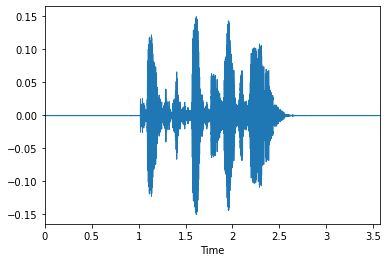

In [ ]:
path_file_sound = df_ravdess['name_file'][100]
                    
data_sound, sampling_rate_sound = librosa.load(path_file_sound)
librosa.display.waveplot(data_sound, sr=sampling_rate_sound)
# play the audio 
ipd.Audio(path_file_sound)

# PRE PROCESSING CREMA

In [ ]:
def dataset_crema(location_directory):
  # location_directory = crema_directory
  list_sex_type = []
  list_statement = []
  list_emotion = []
  list_intensity = []
  list_name_file = []

  female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]
  for i in range(len(os.listdir(location_directory))):
    print(i)
    each_directory = os.listdir(location_directory)[i]
    if '.DS_Store' not in each_directory:
      list_name_file.append(location_directory + '/' + each_directory)
      # print(each_directory.split('.wav')[0].split('_'))
      sex_type = each_directory.split('.wav')[0].split('_')[0]
      statement = each_directory.split('.wav')[0].split('_')[1]
      emotion = each_directory.split('.wav')[0].split('_')[2]
      intensity = each_directory.split('.wav')[0].split('_')[3]
      # sex_type
      if int(sex_type) in female:
        list_sex_type.append('female')
      else:
        list_sex_type.append('male')
      # statement
      if statement == 'IEO':
        list_statement.append("It's eleven o'clock")
      elif statement == 'TIE':
        list_statement.append("That is exactly what happened")
      elif statement == 'IOM':
        list_statement.append("I'm on my way to the meeting")
      elif statement == 'IWW':
        list_statement.append("I wonder what this is about")
      elif statement == 'TAI':
        list_statement.append("The airplane is almost full")
      elif statement == 'MTI':
        list_statement.append("Maybe tomorrow it will be cold")
      elif statement == 'IWL':
        list_statement.append("I would like a new alarm clock")
      elif statement == 'ITH':
        list_statement.append("I think I have a doctor's appointment")
      elif statement == 'DFA':
        list_statement.append("Don't forget a jacket")
      elif statement == 'ITS':
        list_statement.append("I think I've seen this before")
      elif statement == 'TSI':
        list_statement.append("The surface is slick")
      elif statement == 'WSI':
        list_statement.append("We'll stop in a couple of minutes")
      # emotion
      if emotion == 'ANG':
        list_emotion.append("angry")
      elif emotion == 'DIS':
        list_emotion.append("disgust")
      elif emotion == 'FEA':
        list_emotion.append("fear")
      elif emotion == 'HAP':
        list_emotion.append("happy")
      elif emotion == 'NEU':
        list_emotion.append("neutral")
      elif emotion == 'SAD':
        list_emotion.append("sad")
      # intensity
      if intensity == 'LO':
        list_intensity.append("low")
      elif intensity == 'MD':
        list_intensity.append("medium")
      elif intensity == 'HI':
        list_intensity.append("high")
      elif intensity == 'XX':
        list_intensity.append("unspecified")
      else:
        list_intensity.append("unspecified")

  # print(len(list_name_file),len(list_emotion),len(list_intensity),len(list_sex_type))
  df = pd.DataFrame({
      'name_file':list_name_file,
      'emotion':list_emotion,
      'intensity':list_intensity,
      'statement':list_statement,
      'sex_type':list_sex_type,
  })
  return df

df_crema = dataset_crema(crema_directory)
df_crema

Streaming output truncated to the last 5000 lines.
2442
2443
2444
2445
2446
2447
2448
2449
2450
2451
2452
2453
2454
2455
2456
2457
2458
2459
2460
2461
2462
2463
2464
2465
2466
2467
2468
2469
2470
2471
2472
2473
2474
2475
2476
2477
2478
2479
2480
2481
2482
2483
2484
2485
2486
2487
2488
2489
2490
2491
2492
2493
2494
2495
2496
2497
2498
2499
2500
2501
2502
2503
2504
2505
2506
2507
2508
2509
2510
2511
2512
2513
2514
2515
2516
2517
2518
2519
2520
2521
2522
2523
2524
2525
2526
2527
2528
2529
2530
2531
2532
2533
2534
2535
2536
2537
2538
2539
2540
2541
2542
2543
2544
2545
2546
2547
2548
2549
2550
2551
2552
2553
2554
2555
2556
2557
2558
2559
2560
2561
2562
2563
2564
2565
2566
2567
2568
2569
2570
2571
2572
2573
2574
2575
2576
2577
2578
2579
2580
2581
2582
2583
2584
2585
2586
2587
2588
2589
2590
2591
2592
2593
2594
2595
2596
2597
2598
2599
2600
2601
2602
2603
2604
2605
2606
2607
2608
2609
2610
2611
2612
2613
2614
2615
2616
2617
2618
2619
2620
2621
2622
2623
2624
2625
2626
2627
2628
2629
2630
2631

,name_file,emotion,intensity,statement,sex_type
0,/content/drive/MyDrive/essex_university/disser...,disgust,unspecified,The surface is slick,female
1,/content/drive/MyDrive/essex_university/disser...,angry,unspecified,That is exactly what happened,female
2,/content/drive/MyDrive/essex_university/disser...,disgust,unspecified,That is exactly what happened,female
3,/content/drive/MyDrive/essex_university/disser...,fear,unspecified,That is exactly what happened,female
4,/content/drive/MyDrive/essex_university/disser...,neutral,unspecified,The surface is slick,female
...,...,...,...,...,...
7437,/content/drive/MyDrive/essex_university/disser...,neutral,unspecified,I'm on my way to the meeting,female
7438,/content/drive/MyDrive/essex_university/disser...,neutral,unspecified,It's eleven o'clock,female
7439,/content/drive/MyDrive/essex_university/disser...,sad,unspecified,I think I've seen this before,female
7440,/content/drive/MyDrive/essex_university/disser...,fear,unspecified,I think I have a doctor's appointment,female


In [ ]:
df_crema['name_file'][0]

'/content/drive/MyDrive/essex_university/dissertation/assignment_two/dataset/crema_d_dataset/1079_TSI_DIS_XX.wav'

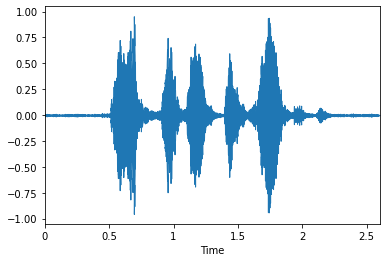

In [ ]:
path_file_sound = df_crema['name_file'][5]
                    
data_sound, sampling_rate_sound = librosa.load(path_file_sound)
librosa.display.waveplot(data_sound, sr=sampling_rate_sound)
# play the audio 
ipd.Audio(path_file_sound)

# PRE PROCESSING SAVEE

In [ ]:
def dataset_savee(location_directory):
  # location_directory = savee_directory
  list_name_file = []
  list_emotion = []
  list_sex_type = []

  for i in range(len(os.listdir(location_directory))):
    each_directory = os.listdir(location_directory)[i]
    if '.DS_Store' not in each_directory:
      # name_file
      list_name_file.append(location_directory + '/' + each_directory)
      # sex_type
      list_sex_type.append('male')
      # emotion
      if '_a' in each_directory:
        list_emotion.append('angry')
      elif '_d' in each_directory:
        list_emotion.append('disgust')
      elif '_f' in each_directory:
        list_emotion.append('fear')
      elif '_h' in each_directory:
        list_emotion.append('happy')
      elif '_n' in each_directory:
        list_emotion.append('neutral')
      elif '_sa' in each_directory:
        list_emotion.append('sad')
      elif '_su' in each_directory:
        list_emotion.append('surprise')
  df = pd.DataFrame({
      'name_file':list_name_file,
      'emotion':list_emotion,
      'sex_type':list_sex_type,
  })
  return df
df_savee = dataset_savee(savee_directory)
df_savee

,name_file,emotion,sex_type
0,/content/drive/MyDrive/essex_university/disser...,angry,male
1,/content/drive/MyDrive/essex_university/disser...,angry,male
2,/content/drive/MyDrive/essex_university/disser...,angry,male
3,/content/drive/MyDrive/essex_university/disser...,angry,male
4,/content/drive/MyDrive/essex_university/disser...,angry,male
...,...,...,...
475,/content/drive/MyDrive/essex_university/disser...,sad,male
476,/content/drive/MyDrive/essex_university/disser...,sad,male
477,/content/drive/MyDrive/essex_university/disser...,neutral,male
478,/content/drive/MyDrive/essex_university/disser...,neutral,male


In [ ]:
df_savee['name_file'][0]

'/content/drive/MyDrive/essex_university/dissertation/assignment_two/dataset/savee_dataset/DC_a01.wav'

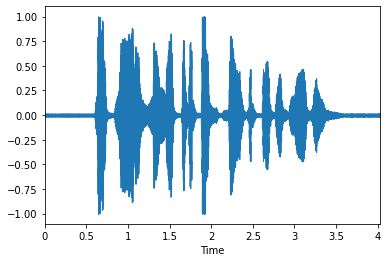

In [ ]:
path_file_sound = df_savee['name_file'][5]
                    
data_sound, sampling_rate_sound = librosa.load(path_file_sound)
librosa.display.waveplot(data_sound, sr=sampling_rate_sound)
# play the audio 
ipd.Audio(path_file_sound)

# PRE PROCESSING TESS

In [ ]:
def dataset_tess(location_directory):
  list_name_file = []
  list_emotion = []
  list_statement = []
  list_sex_type = []
  # location_directory = tess_directory
  for i in range(len(os.listdir(location_directory))):
    each_directory = os.listdir(location_directory)[i]
    if '.DS_Store' not in each_directory:

      all_file = location_directory + '/' +  each_directory
      for j in range(len(os.listdir(all_file))):
        # sex_type
        list_sex_type.append('female')
        # emotion
        if each_directory == 'OAF_angry' or each_directory == 'YAF_angry':
            list_emotion.append('angry')
        elif each_directory == 'OAF_disgust' or each_directory == 'YAF_disgust':
            list_emotion.append('disgust')
        elif each_directory == 'OAF_Fear' or each_directory == 'YAF_fear':
            list_emotion.append('fear')
        elif each_directory == 'OAF_happy' or each_directory == 'YAF_happy':
            list_emotion.append('happy')
        elif each_directory == 'OAF_neutral' or each_directory == 'YAF_neutral':
            list_emotion.append('neutral')                                
        elif each_directory == 'OAF_Pleasant_surprise' or each_directory == 'YAF_pleasant_surprised':
            list_emotion.append('surprise')               
        elif each_directory == 'OAF_Sad' or each_directory == 'YAF_sad':
            list_emotion.append('sad')
        each_file = os.listdir(all_file)[j]
        # statement
        list_statement.append(each_file.split('_')[1])
        # name_file
        list_name_file.append(tess_directory + '/' + each_directory + '/' + each_file)
  df = pd.DataFrame({
      'name_file':list_name_file,
      'emotion':list_emotion,
      'statement':list_statement,
      'sex_type':list_sex_type,
  })
  return df
df_tess = dataset_tess(tess_directory)
df_tess


,name_file,emotion,statement,sex_type
0,/content/drive/MyDrive/essex_university/disser...,fear,bar,female
1,/content/drive/MyDrive/essex_university/disser...,fear,back,female
2,/content/drive/MyDrive/essex_university/disser...,fear,base,female
3,/content/drive/MyDrive/essex_university/disser...,fear,beg,female
4,/content/drive/MyDrive/essex_university/disser...,fear,bean,female
...,...,...,...,...
2795,/content/drive/MyDrive/essex_university/disser...,disgust,youth,female
2796,/content/drive/MyDrive/essex_university/disser...,disgust,wire,female
2797,/content/drive/MyDrive/essex_university/disser...,disgust,witch,female
2798,/content/drive/MyDrive/essex_university/disser...,disgust,young,female


In [ ]:
df_tess['name_file'][0]

'/content/drive/MyDrive/essex_university/dissertation/assignment_two/dataset/tess_dataset/OAF_Fear/OAF_bar_fear.wav'

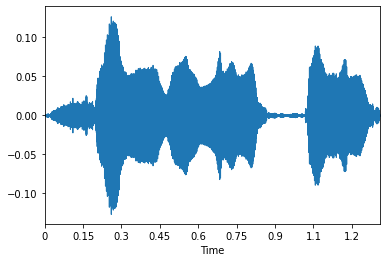

In [ ]:
path_file_sound = df_tess['name_file'][5]
                    
data_sound, sampling_rate_sound = librosa.load(path_file_sound)
librosa.display.waveplot(data_sound, sr=sampling_rate_sound)
# play the audio 
ipd.Audio(path_file_sound)

# Combine Data

In [ ]:
df_ravdess.head(2)

,name_file,modality,vocal_channel,emotion,intensity,statement,repetition,sex_type
0,/content/drive/MyDrive/essex_university/disser...,audio-only,speech,neutral,strong,Kids are talking by the door,2nd repetition,female
1,/content/drive/MyDrive/essex_university/disser...,audio-only,speech,sad,strong,Dogs are sitting by the door,2nd repetition,female


In [ ]:
df_crema.head(2)

,name_file,emotion,intensity,statement,sex_type
0,/content/drive/MyDrive/essex_university/disser...,disgust,unspecified,The surface is slick,female
1,/content/drive/MyDrive/essex_university/disser...,angry,unspecified,That is exactly what happened,female


In [ ]:
df_savee.head(2)

,name_file,emotion,sex_type
0,/content/drive/MyDrive/essex_university/disser...,angry,male
1,/content/drive/MyDrive/essex_university/disser...,angry,male


In [ ]:
df_tess.head(2)

,name_file,emotion,statement,sex_type
0,/content/drive/MyDrive/essex_university/disser...,fear,bar,female
1,/content/drive/MyDrive/essex_university/disser...,fear,back,female


In [ ]:
# df_ravdess[['name_file','emotion','sex_type']]
# df_crema[['name_file','emotion','sex_type']]
# df_savee[['name_file','emotion','sex_type']]
# df_tess[['name_file','emotion','sex_type']]
df = pd.concat([df_ravdess[['name_file','emotion','sex_type']], df_crema[['name_file','emotion','sex_type']], df_savee[['name_file','emotion','sex_type']], df_tess[['name_file','emotion','sex_type']]], axis = 0)
df

,name_file,emotion,sex_type
0,/content/drive/MyDrive/essex_university/disser...,neutral,female
1,/content/drive/MyDrive/essex_university/disser...,sad,female
2,/content/drive/MyDrive/essex_university/disser...,sad,female
3,/content/drive/MyDrive/essex_university/disser...,happy,female
4,/content/drive/MyDrive/essex_university/disser...,neutral,female
...,...,...,...
2795,/content/drive/MyDrive/essex_university/disser...,disgust,female
2796,/content/drive/MyDrive/essex_university/disser...,disgust,female
2797,/content/drive/MyDrive/essex_university/disser...,disgust,female
2798,/content/drive/MyDrive/essex_university/disser...,disgust,female


In [ ]:
df['emotion'].value_counts()

sad         1923
happy       1923
angry       1923
fear        1923
disgust     1923
neutral     1895
surprise     652
Name: emotion, dtype: int64

In [ ]:
df['sex_type'].value_counts()

female    7032
male      5130
Name: sex_type, dtype: int64

In [ ]:
df['name_file']

0       /content/drive/MyDrive/essex_university/disser...
1       /content/drive/MyDrive/essex_university/disser...
2       /content/drive/MyDrive/essex_university/disser...
3       /content/drive/MyDrive/essex_university/disser...
4       /content/drive/MyDrive/essex_university/disser...
                              ...                        
2795    /content/drive/MyDrive/essex_university/disser...
2796    /content/drive/MyDrive/essex_university/disser...
2797    /content/drive/MyDrive/essex_university/disser...
2798    /content/drive/MyDrive/essex_university/disser...
2799    /content/drive/MyDrive/essex_university/disser...
Name: name_file, Length: 12162, dtype: object

we combine 4 datasets to have enough data for train data and protect overfitting!!!!

# check point one

In [ ]:
df

,name_file,emotion,sex_type
0,/content/drive/MyDrive/essex_university/disser...,neutral,female
1,/content/drive/MyDrive/essex_university/disser...,sad,female
2,/content/drive/MyDrive/essex_university/disser...,sad,female
3,/content/drive/MyDrive/essex_university/disser...,happy,female
4,/content/drive/MyDrive/essex_university/disser...,neutral,female
...,...,...,...
2795,/content/drive/MyDrive/essex_university/disser...,disgust,female
2796,/content/drive/MyDrive/essex_university/disser...,disgust,female
2797,/content/drive/MyDrive/essex_university/disser...,disgust,female
2798,/content/drive/MyDrive/essex_university/disser...,disgust,female


In [ ]:
df.to_csv("/content/drive/MyDrive/essex_university/dissertation/assignment_two/code_v3/checkpoint_v1.csv",index=False)
print("completed")

completed


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/essex_university/dissertation/assignment_two/code_v3/checkpoint_v1.csv")
df

,name_file,emotion,sex_type
0,/content/drive/MyDrive/essex_university/disser...,neutral,female
1,/content/drive/MyDrive/essex_university/disser...,sad,female
2,/content/drive/MyDrive/essex_university/disser...,sad,female
3,/content/drive/MyDrive/essex_university/disser...,happy,female
4,/content/drive/MyDrive/essex_university/disser...,neutral,female
...,...,...,...
12157,/content/drive/MyDrive/essex_university/disser...,disgust,female
12158,/content/drive/MyDrive/essex_university/disser...,disgust,female
12159,/content/drive/MyDrive/essex_university/disser...,disgust,female
12160,/content/drive/MyDrive/essex_university/disser...,disgust,female


# Exploratory Data Analysis

In [ ]:
df_visualization = pd.DataFrame({})
df_visualization['name_file'] = df['name_file'].map(lambda x : x.split('/')[8].split('_')[0])
df_visualization['emotion'] = df['emotion']
df_visualization['sex_type'] = df['sex_type']
df_visualization.info()
df_visualization

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12162 entries, 0 to 12161
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name_file  12162 non-null  object
 1   emotion    12162 non-null  object
 2   sex_type   12162 non-null  object
dtypes: object(3)
memory usage: 285.2+ KB


,name_file,emotion,sex_type
0,ravdess,neutral,female
1,ravdess,sad,female
2,ravdess,sad,female
3,ravdess,happy,female
4,ravdess,neutral,female
...,...,...,...
12157,tess,disgust,female
12158,tess,disgust,female
12159,tess,disgust,female
12160,tess,disgust,female


In [ ]:
print("name_file =",df_visualization['name_file'].unique())
print("emotion =",df_visualization['emotion'].unique())
print("sex_type =",df_visualization['sex_type'].unique())

name_file = ['ravdess' 'crema' 'savee' 'tess']
emotion = ['neutral' 'sad' 'happy' 'angry' 'fear' 'disgust' 'surprise']
sex_type = ['female' 'male']


In [ ]:
all_columns_vir = df_visualization.columns.tolist()

for i in range(len(all_columns_vir)):
  list_unique_each_column = df_visualization[f'{all_columns_vir[i]}'].unique().tolist()
  print("==============================================")
  for j in range(len(list_unique_each_column)):
    len_unique = len(df_visualization[df_visualization[f'{all_columns_vir[i]}'] == list_unique_each_column[j]])
    print(f"column name = {all_columns_vir[i]}, {list_unique_each_column[j]} have",len_unique)


column name = name_file, ravdess have 1440
column name = name_file, crema have 7442
column name = name_file, savee have 480
column name = name_file, tess have 2800
column name = emotion, neutral have 1895
column name = emotion, sad have 1923
column name = emotion, happy have 1923
column name = emotion, angry have 1923
column name = emotion, fear have 1923
column name = emotion, disgust have 1923
column name = emotion, surprise have 652
column name = sex_type, female have 7032
column name = sex_type, male have 5130


In [ ]:
df_visualization = df_visualization.replace(
    {'name_file': {'ravdess': 0, 'crema': 1, 'savee':2, 'tess':3},
     'emotion':{'neutral': 0, 'sad': 1, 'happy':2, 'angry':3, 'fear':4, 'disgust':5, 'surprise':6},
     'sex_type':{'female': 0, 'male': 1}
})
df_visualization

,name_file,emotion,sex_type
0,0,0,0
1,0,1,0
2,0,1,0
3,0,2,0
4,0,0,0
...,...,...,...
12157,3,5,0
12158,3,5,0
12159,3,5,0
12160,3,5,0


In [ ]:
df_visualization.describe()

,name_file,emotion,sex_type
count,12162.000000,12162.000000,12162.000000
mean,1.381516,2.693389,0.421806
std,0.966070,1.836362,0.493868
min,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000
50%,1.000000,3.000000,0.000000
75%,2.000000,4.000000,1.000000
max,3.000000,6.000000,1.000000


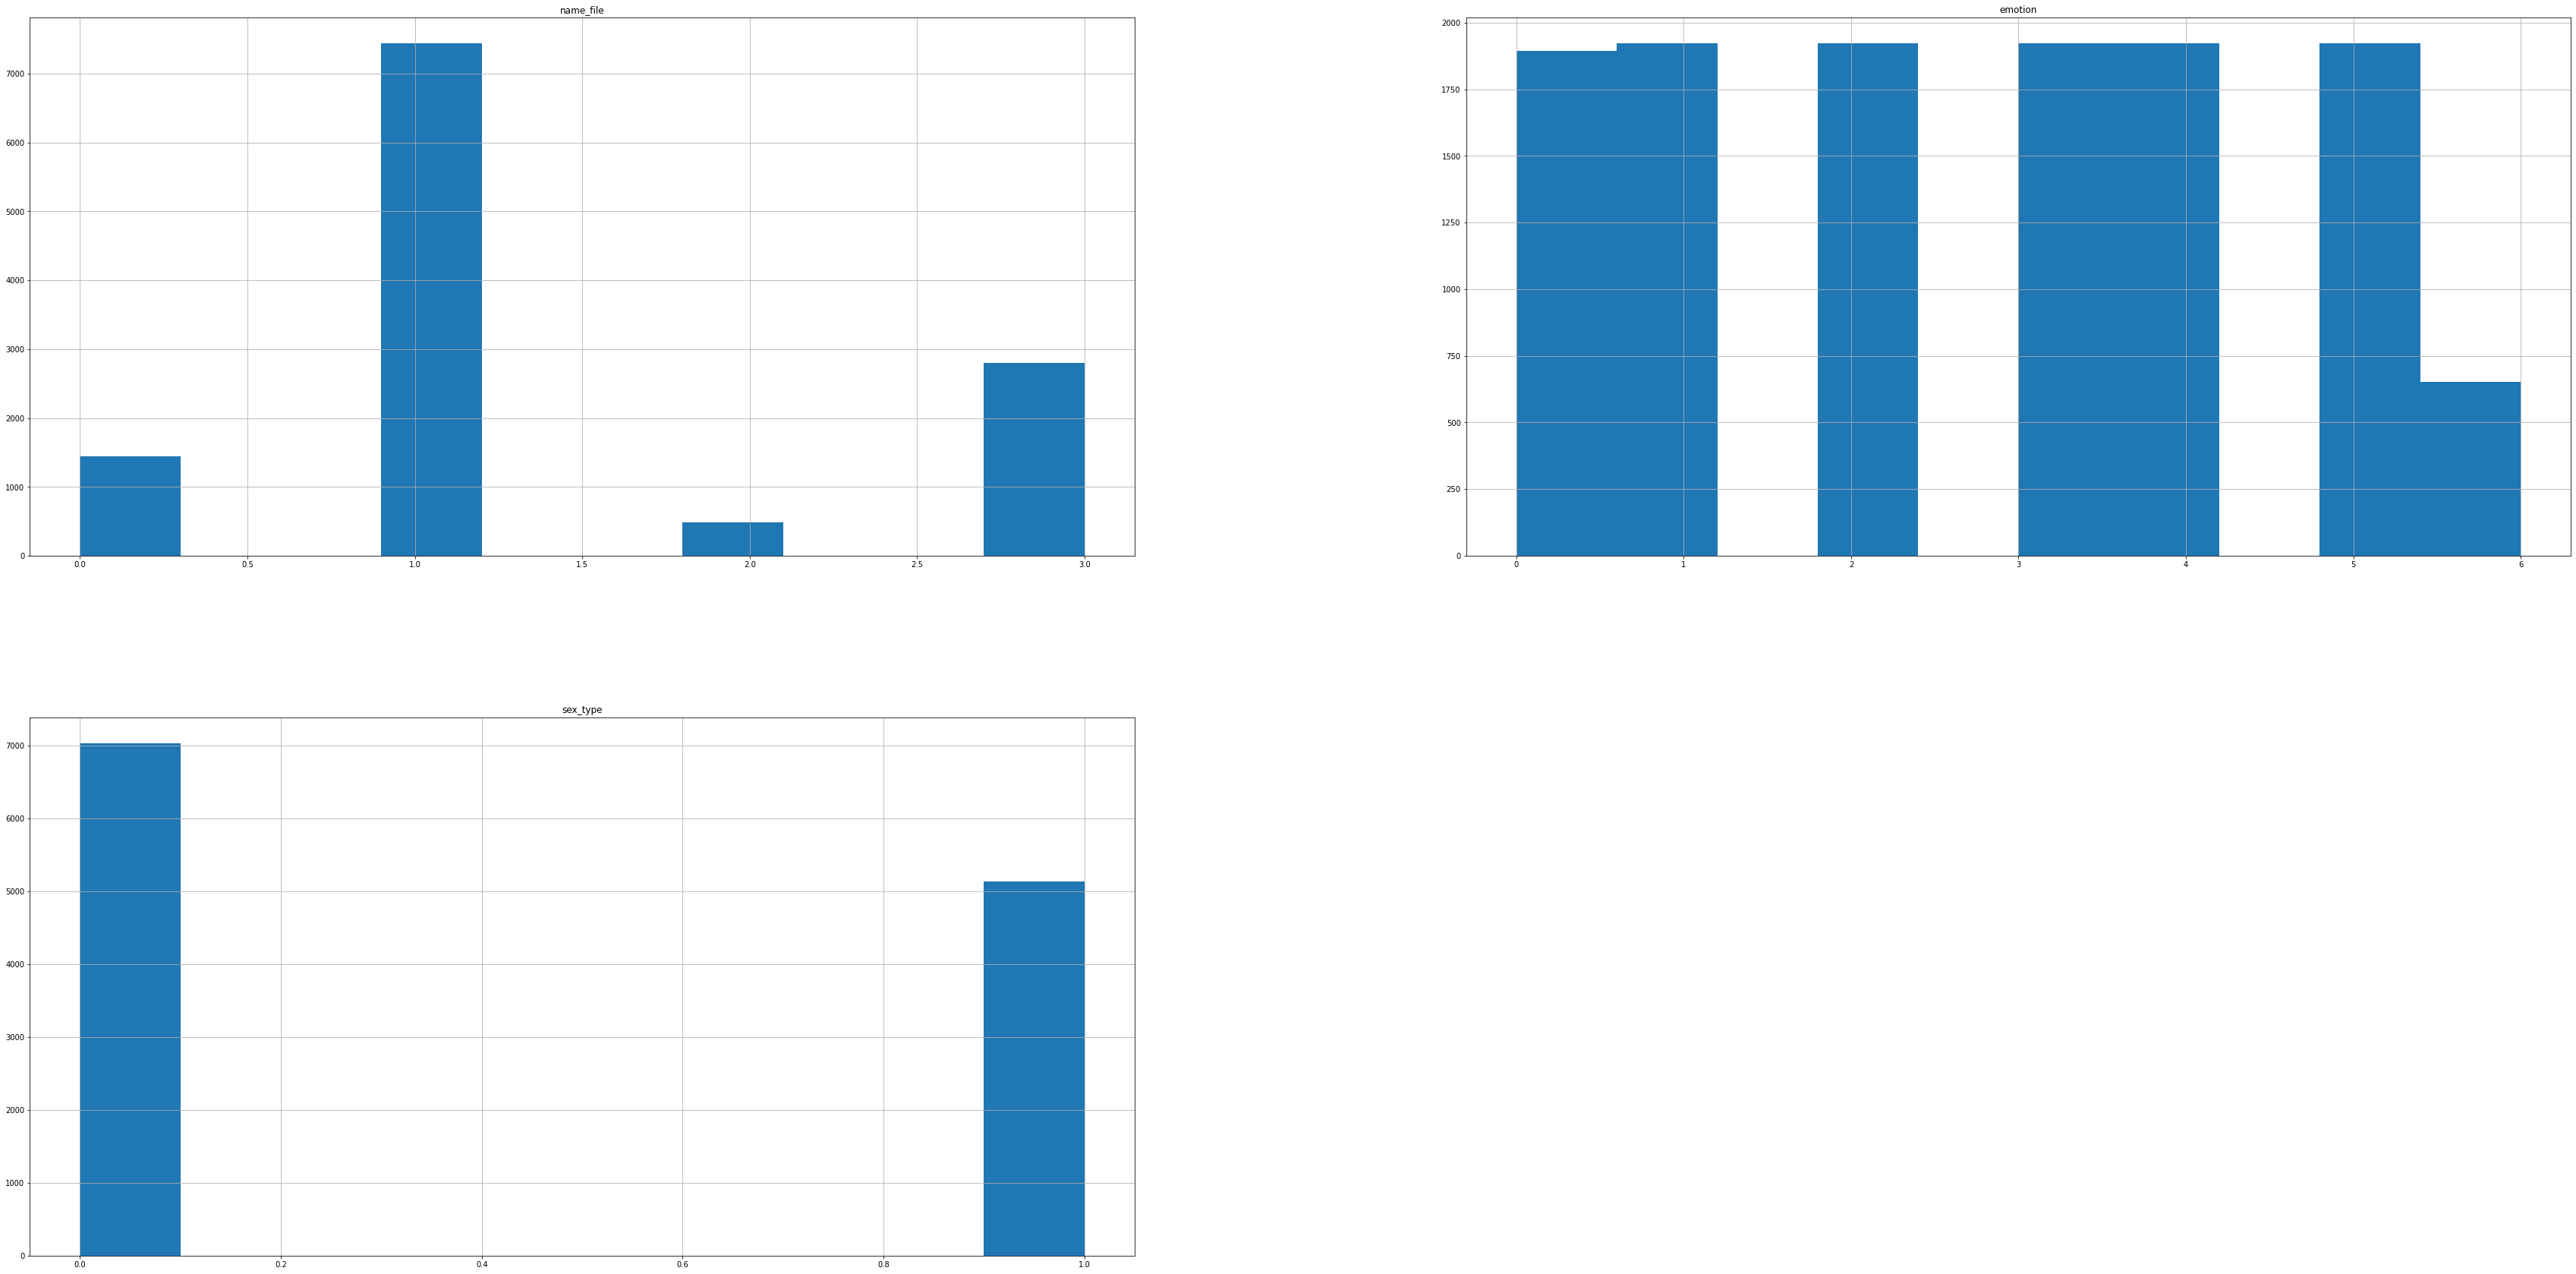

In [ ]:
df_visualization.hist(figsize = (60,30))
plt.show()    

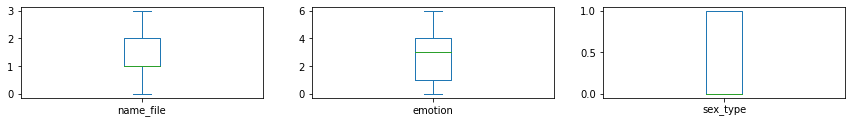

In [ ]:
df_visualization.plot(kind='box', subplots=True, figsize=(20, 40),layout=(20,4))
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

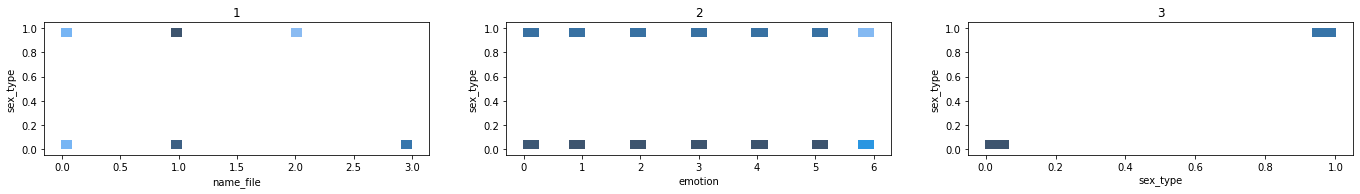

In [ ]:
# compare class column with every column.
plt.figure(figsize=(40,20))

for i, column in enumerate(df_visualization.columns):
  plt.subplot(7,5,i+1)
  sns.histplot(x = df_visualization[column],y= df_visualization['sex_type'])
  plt.title(i+1)
plt.show

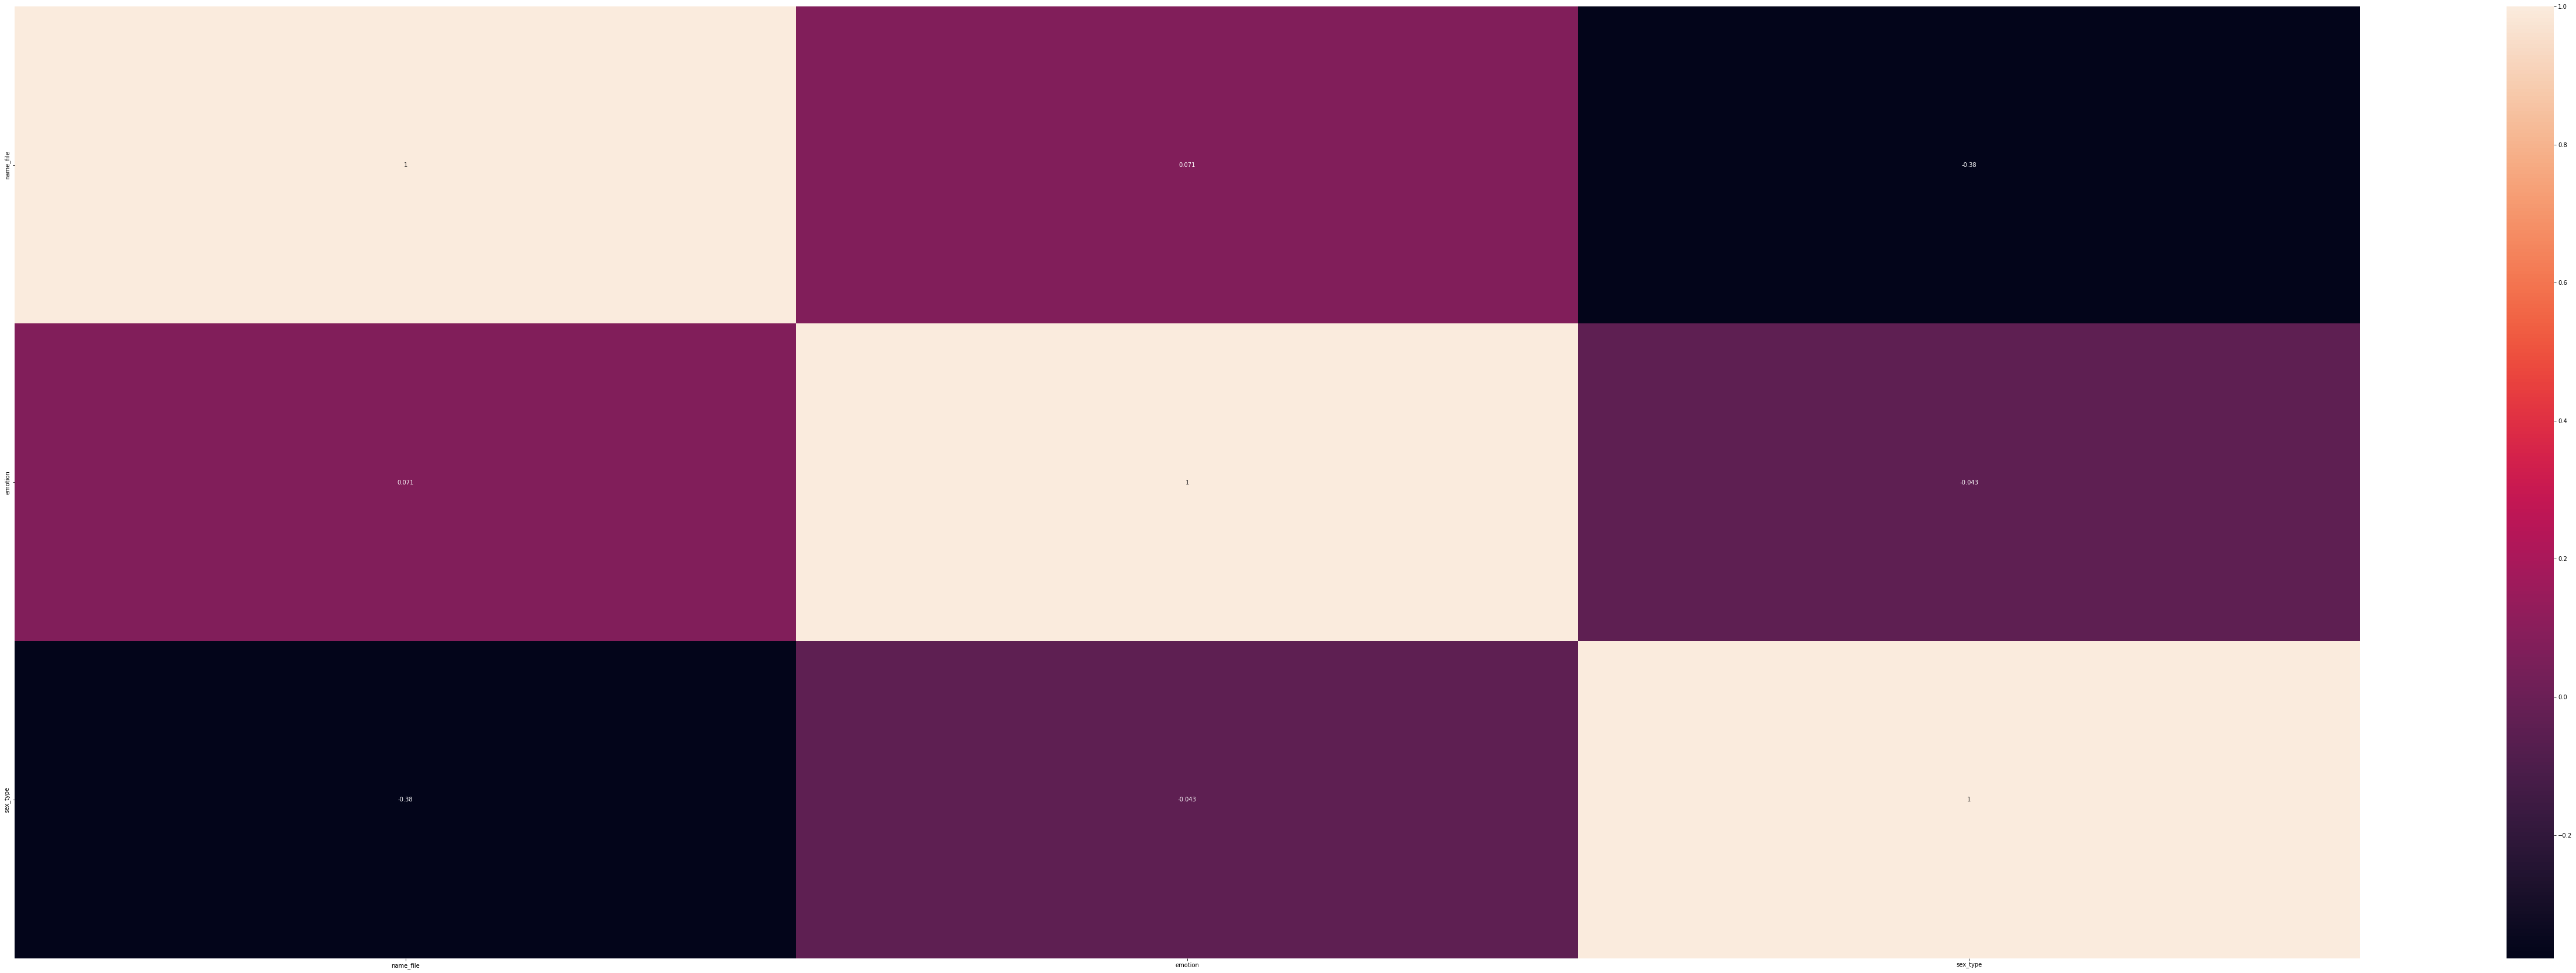

In [ ]:
# we see the correlation of all columns. According to the color scale is between [-1,1].
plt.figure(figsize = (90,30))
data_corr = df_visualization.corr()
sns.heatmap(data_corr,xticklabels=data_corr.columns,yticklabels=df.columns,annot=True)

# DATA PREPARATION

In [ ]:
# del df["sex_type"]
df

,name_file,emotion,sex_type
0,/content/drive/MyDrive/essex_university/disser...,neutral,female
1,/content/drive/MyDrive/essex_university/disser...,sad,female
2,/content/drive/MyDrive/essex_university/disser...,sad,female
3,/content/drive/MyDrive/essex_university/disser...,happy,female
4,/content/drive/MyDrive/essex_university/disser...,neutral,female
...,...,...,...
12157,/content/drive/MyDrive/essex_university/disser...,disgust,female
12158,/content/drive/MyDrive/essex_university/disser...,disgust,female
12159,/content/drive/MyDrive/essex_university/disser...,disgust,female
12160,/content/drive/MyDrive/essex_university/disser...,disgust,female


In [ ]:
# df = df[:500]

In [ ]:
df['emotion'].value_counts()

sad         1923
happy       1923
angry       1923
fear        1923
disgust     1923
neutral     1895
surprise     652
Name: emotion, dtype: int64

In [ ]:
df['sex_type'].value_counts()

female    7032
male      5130
Name: sex_type, dtype: int64

In [ ]:
print("female have",7032/(7032+5130),"percent")
print("male have",5130/(7032+5130),"percent")
print("data balance don't use smote and f-1 score")

female have 0.5781943759250123 percent
male have 0.4218056240749877 percent
data balance don't use smote and f-1 score


# CREATE FUNCTION

In [ ]:
def noise_calculation(data_val):
    threshold_val=0.075
    data_val = data_val + np.random.random() * threshold_val *np.random.uniform()*np.amax(data_val) *np.random.normal(size=data_val.shape[0])
    return data_val

def pitch_calculation(data_val, sampling_rate_val):
    pitch_factor_val=0.7
    return librosa.effects.pitch_shift(data_val, sampling_rate_val, np.random.random() * pitch_factor_val)

In [ ]:
def extract_features_calculation(data_val, sample_rate_val):
    frame_length_val = 2048
    hop_length_val = 512
    flatten_bool = True
    extract_features_numpy = np.array([])
    extract_features_numpy = np.hstack((extract_features_numpy,
        # zero crossing rate
        np.squeeze(librosa.feature.zero_crossing_rate(y=data_val, frame_length=frame_length_val, hop_length=hop_length_val)),
        # rmse
        np.squeeze(librosa.feature.rms(y=data_val, frame_length=frame_length_val, hop_length=hop_length_val)),
        # mfcc
        np.squeeze(librosa.feature.mfcc(y=data_val, sr=sample_rate_val).T) if not flatten_bool else np.ravel(librosa.feature.mfcc(y=data_val, sr=sample_rate_val).T)
    ))
    return extract_features_numpy

In [ ]:
def generate_features(path_file):
    # duration of time
    offset_val=0.6
    duration_val=2.5
    data_val, sample_rate_val = librosa.load(path_file, duration=duration_val, offset=offset_val)

    # extract feature
    extract_features_numpy = extract_features_calculation(data_val, sample_rate_val)
    result_np_ef = np.array(extract_features_numpy)

    # noise data
    noise_data_val = noise_calculation(data_val)
    efc_result = extract_features_calculation(noise_data_val, sample_rate_val)
    result_np_ef = np.vstack((result_np_ef, efc_result))

    # pitching data
    pitch_data_val = pitch_calculation(data_val, sample_rate_val)
    efc_result = extract_features_calculation(pitch_data_val, sample_rate_val)
    result_np_ef = np.vstack((result_np_ef, efc_result))

    # combine pitching data and clean noise data --
    pitch_data_cal = pitch_calculation(data_val, sample_rate_val)
    data_noise_pitch_val = noise_calculation(pitch_data_cal)
    efc_result = extract_features_calculation(data_noise_pitch_val, sample_rate_val)
    result_np_ef = np.vstack((result_np_ef, efc_result))

    return result_np_ef

In [ ]:
list_feature = []
list_label = []
list_gender = []
for name_file_record, emotion_record, gender_record, i in zip(df["name_file"], df["emotion"],df["sex_type"], range(df["name_file"].shape[0])):
    each_features = generate_features(name_file_record)
    if i % 100 == 0:
        print(f"This is record {i}")
    for j in each_features:
        list_feature.append(j)
        list_label.append(emotion_record)
        list_gender.append(gender_record)

This is record 0
This is record 100
This is record 200
This is record 300
This is record 400
This is record 500
This is record 600
This is record 700
This is record 800
This is record 900
This is record 1000
This is record 1100
This is record 1200
This is record 1300
This is record 1400
This is record 1500
This is record 1600
This is record 1700
This is record 1800
This is record 1900
This is record 2000
This is record 2100
This is record 2200
This is record 2300
This is record 2400
This is record 2500
This is record 2600
This is record 2700
This is record 2800
This is record 2900
This is record 3000
This is record 3100
This is record 3200
This is record 3300
This is record 3400
This is record 3500
This is record 3600
This is record 3700
This is record 3800
This is record 3900
This is record 4000
This is record 4100
This is record 4200
This is record 4300
This is record 4400
This is record 4500
This is record 4600
This is record 4700
This is record 4800
This is record 4900
This is reco

In [ ]:
df_clean_data = pd.DataFrame(list_feature)
df_clean_data["emotion"] = list_label
df_clean_data["gender"] = list_gender
df_clean_data.to_csv("/content/drive/MyDrive/essex_university/dissertation/assignment_two/code_v3/checkpoint_v3_add_gender.csv", index=False)
df_clean_data.head()
print("file upload")

file upload


# check point two

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/essex_university/dissertation/assignment_two/code_v3/checkpoint_v3_add_gender.csv")
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48648 entries, 0 to 48647
Columns: 2378 entries, 0 to gender
dtypes: float64(2376), object(2)
memory usage: 882.6+ MB


,0,1,2,3,4,5,6,7,8,9,...,2368,2369,2370,2371,2372,2373,2374,2375,emotion,gender
0,0.260742,0.312500,0.312500,0.185059,0.130371,0.191406,0.305176,0.326660,0.319824,0.284180,...,0.154335,-1.792320,1.812561,0.974394,1.651097,9.140385,7.712218,7.271248,neutral,female
1,0.185547,0.232422,0.234375,0.148926,0.111816,0.153320,0.239746,0.270020,0.268066,0.261719,...,-0.647539,1.711680,0.456879,1.471922,2.502895,8.246724,8.931411,6.114696,neutral,female
2,0.086914,0.110352,0.110352,0.049805,0.041016,0.043457,0.091797,0.121582,0.181152,0.239746,...,4.273255,6.451339,7.631994,6.305041,4.076422,1.346368,2.032737,8.031541,neutral,female
3,0.236816,0.349609,0.453125,0.408691,0.395508,0.400391,0.411621,0.442383,0.452148,0.443848,...,-0.378162,-1.569095,5.468384,9.043862,2.246045,2.142469,1.344615,-0.131994,neutral,female
4,0.136719,0.208008,0.271973,0.267090,0.257324,0.247070,0.251953,0.243164,0.197266,0.179199,...,1.275351,11.402136,6.619304,-6.211828,-7.745015,4.286483,15.148426,14.956486,sad,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48643,0.062012,0.075684,0.096680,0.069824,0.052734,0.053711,0.044434,0.041992,0.044922,0.041504,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,disgust,female
48644,0.075195,0.095703,0.114258,0.096680,0.079590,0.069824,0.054688,0.041992,0.042969,0.043945,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,disgust,female
48645,0.076172,0.096680,0.115234,0.097656,0.080566,0.069824,0.054688,0.041992,0.041992,0.043945,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,disgust,female
48646,0.082031,0.134277,0.160156,0.136230,0.122559,0.101074,0.099609,0.102051,0.093262,0.077637,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,disgust,female


In [ ]:
# list_choose_df = []
# df_new = pd.DataFrame({})
# for i in range(len(df)):
#   if df.index[i] % 96 == 0 or df.index[i] % 96 == 1 or df.index[i] % 96 == 2 or df.index[i] % 96 == 3:

#     df_new = pd.concat([df_new, df[i:i+1]])
# df_new = df_new.reset_index()
# del df_new['index']
# df = df_new


In [ ]:
# change nan value to zero
df = df.fillna(0)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48648 entries, 0 to 48647
Columns: 2378 entries, 0 to gender
dtypes: float64(2376), object(2)
memory usage: 882.6+ MB


,0,1,2,3,4,5,6,7,8,9,...,2368,2369,2370,2371,2372,2373,2374,2375,emotion,gender
0,0.260742,0.312500,0.312500,0.185059,0.130371,0.191406,0.305176,0.326660,0.319824,0.284180,...,0.154335,-1.792320,1.812561,0.974394,1.651097,9.140385,7.712218,7.271248,neutral,female
1,0.185547,0.232422,0.234375,0.148926,0.111816,0.153320,0.239746,0.270020,0.268066,0.261719,...,-0.647539,1.711680,0.456879,1.471922,2.502895,8.246724,8.931411,6.114696,neutral,female
2,0.086914,0.110352,0.110352,0.049805,0.041016,0.043457,0.091797,0.121582,0.181152,0.239746,...,4.273255,6.451339,7.631994,6.305041,4.076422,1.346368,2.032737,8.031541,neutral,female
3,0.236816,0.349609,0.453125,0.408691,0.395508,0.400391,0.411621,0.442383,0.452148,0.443848,...,-0.378162,-1.569095,5.468384,9.043862,2.246045,2.142469,1.344615,-0.131994,neutral,female
4,0.136719,0.208008,0.271973,0.267090,0.257324,0.247070,0.251953,0.243164,0.197266,0.179199,...,1.275351,11.402136,6.619304,-6.211828,-7.745015,4.286483,15.148426,14.956486,sad,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48643,0.062012,0.075684,0.096680,0.069824,0.052734,0.053711,0.044434,0.041992,0.044922,0.041504,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,disgust,female
48644,0.075195,0.095703,0.114258,0.096680,0.079590,0.069824,0.054688,0.041992,0.042969,0.043945,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,disgust,female
48645,0.076172,0.096680,0.115234,0.097656,0.080566,0.069824,0.054688,0.041992,0.041992,0.043945,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,disgust,female
48646,0.082031,0.134277,0.160156,0.136230,0.122559,0.101074,0.099609,0.102051,0.093262,0.077637,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,disgust,female


# train_test_split_machine_learning

In [ ]:
# df['gender'].map(lambda x: str(x)) + df.map(lambda x: str(x) + '_')
df['labels'] = df['gender'].map(lambda x: str(x) + '_') + df['emotion'].map(lambda x: str(x))
df = df.drop(labels=["emotion","gender"], axis=1)
df

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,labels
0,0.260742,0.312500,0.312500,0.185059,0.130371,0.191406,0.305176,0.326660,0.319824,0.284180,...,-4.222076,0.154335,-1.792320,1.812561,0.974394,1.651097,9.140385,7.712218,7.271248,female_neutral
1,0.185547,0.232422,0.234375,0.148926,0.111816,0.153320,0.239746,0.270020,0.268066,0.261719,...,-3.848477,-0.647539,1.711680,0.456879,1.471922,2.502895,8.246724,8.931411,6.114696,female_neutral
2,0.086914,0.110352,0.110352,0.049805,0.041016,0.043457,0.091797,0.121582,0.181152,0.239746,...,1.513948,4.273255,6.451339,7.631994,6.305041,4.076422,1.346368,2.032737,8.031541,female_neutral
3,0.236816,0.349609,0.453125,0.408691,0.395508,0.400391,0.411621,0.442383,0.452148,0.443848,...,0.100280,-0.378162,-1.569095,5.468384,9.043862,2.246045,2.142469,1.344615,-0.131994,female_neutral
4,0.136719,0.208008,0.271973,0.267090,0.257324,0.247070,0.251953,0.243164,0.197266,0.179199,...,-4.276752,1.275351,11.402136,6.619304,-6.211828,-7.745015,4.286483,15.148426,14.956486,female_sad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48643,0.062012,0.075684,0.096680,0.069824,0.052734,0.053711,0.044434,0.041992,0.044922,0.041504,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,female_disgust
48644,0.075195,0.095703,0.114258,0.096680,0.079590,0.069824,0.054688,0.041992,0.042969,0.043945,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,female_disgust
48645,0.076172,0.096680,0.115234,0.097656,0.080566,0.069824,0.054688,0.041992,0.041992,0.043945,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,female_disgust
48646,0.082031,0.134277,0.160156,0.136230,0.122559,0.101074,0.099609,0.102051,0.093262,0.077637,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,female_disgust


In [ ]:
# df = df[:100]
X = df.drop(labels=["labels"], axis=1)
y = df[["labels"]]

In [ ]:
# label_encoder = LabelEncoder()
# y = np_utils.to_categorical(label_encoder.fit_transform(y))
# y,label_encoder.classes_

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=300, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((38918, 2376), (9730, 2376), (38918, 1), (9730, 1))

In [ ]:
y_train.value_counts()

labels         
female_sad         3531
female_angry       3529
female_fear        3527
female_disgust     3508
female_happy       3491
female_neutral     3335
male_angry         2664
male_disgust       2656
male_neutral       2653
male_fear          2649
male_sad           2648
male_happy         2647
female_surprise    1582
male_surprise       498
dtype: int64

In [ ]:
y_test.value_counts()

labels         
female_happy       893
female_neutral     889
female_disgust     876
female_fear        857
female_angry       855
female_sad         853
male_neutral       703
male_happy         661
male_sad           660
male_fear          659
male_disgust       652
male_angry         644
female_surprise    402
male_surprise      126
dtype: int64

In [ ]:
# standard_scaler = StandardScaler()
# X_train_scalar = standard_scaler.fit_transform(X_train)
# X_test_scalar = standard_scaler.transform(X_test)
# X_train_scalar.shape, X_test_scalar.shape, y_train.shape, y_test.shape

In [ ]:
# X_train_scalar = np.expand_dims(X_train_scalar, axis=2)
# X_test_scalar = np.expand_dims(X_test_scalar, axis=2)
# X_train_scalar.shape,X_test_scalar.shape

# Machine Learning

## Decision Tree

### Default Parameter

                 precision    recall  f1-score   support

   female_angry       0.52      0.51      0.52       855
 female_disgust       0.49      0.48      0.48       876
    female_fear       0.45      0.44      0.44       857
   female_happy       0.48      0.48      0.48       893
 female_neutral       0.50      0.49      0.49       889
     female_sad       0.48      0.52      0.50       853
female_surprise       0.57      0.56      0.57       402
     male_angry       0.49      0.48      0.48       644
   male_disgust       0.32      0.32      0.32       652
      male_fear       0.35      0.34      0.34       659
     male_happy       0.36      0.39      0.38       661
   male_neutral       0.41      0.40      0.40       703
       male_sad       0.35      0.36      0.36       660
  male_surprise       0.47      0.45      0.46       126

       accuracy                           0.45      9730
      macro avg       0.45      0.44      0.44      9730
   weighted avg       0.45   

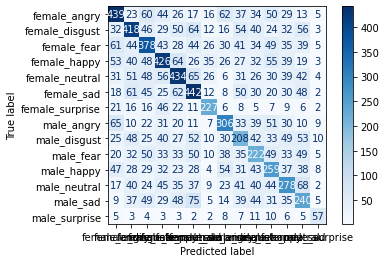

time to finish all process = 0:34:04.569252


In [ ]:
start_time = datetime.now()
model = DecisionTreeClassifier()
scalar_use = StandardScaler()

pipe = Pipeline([('scaler', scalar_use), ('clf', model)])
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(pipe, X_train, y_train, cv=kfold, scoring = "accuracy")
pipe.fit(X_train, y_train)
# predict y value
y_pred_model =pipe.predict(X_test)
# classification_report
print(classification_report(y_test, y_pred_model))
# accuracy score
print(f'accuracy_score_{model}:',accuracy_score(y_test, y_pred_model))
print(f'accuracy_score_{model}: {cv_results.mean()} +/- {cv_results.std()}')
print(f"list_cross_validation_{model}:",cv_results)
# confusion_matrix
plot_confusion_matrix(pipe, X_test, y_test,cmap="Blues")
plt.show()
finish_time = datetime.now()
print("time to finish all process =",finish_time-start_time)

### Tuning Parameter

In [ ]:
start_time = datetime.now()
model = DecisionTreeClassifier()
params = {
    'clf__criterion': ["gini", "entropy"],
    'clf__splitter': ["best","random"],
    'clf__max_depth': [3,5,None],
    'clf__min_samples_split': [2,4,8],
    'clf__min_samples_leaf': [1,2,4],
    'clf__max_features':['auto','sqrt','log2']
}

scalar_use = StandardScaler()


pipe = Pipeline(steps=[('scaler', scalar_use), ('clf', model)])

# GridSearchCV
# param_grid= mp['params'],

random_search = GridSearchCV(
  estimator = pipe,
  param_grid= params,
  # n_iter=100,
  cv=5,
)
random_search.fit(X_train,y_train)
print('best_score =', random_search.best_score_)
print('best_params =', random_search.best_params_)
print('best_estimator =', random_search.best_estimator_)

finish_time = datetime.now()
print("time to finish all process =",finish_time-start_time)

best_score = 0.43528584995251657
best_params = {'clf__criterion': 'gini', 'clf__max_depth': None, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__splitter': 'random'}
best_estimator = Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 DecisionTreeClassifier(max_features='sqrt',
                                        splitter='random'))])
time to finish all process = 0:05:13.812880


### Evaluation Model with tuning parameter

                 precision    recall  f1-score   support

   female_angry       0.43      0.42      0.42       855
 female_disgust       0.42      0.40      0.41       876
    female_fear       0.42      0.44      0.43       857
   female_happy       0.41      0.40      0.41       893
 female_neutral       0.43      0.42      0.43       889
     female_sad       0.45      0.45      0.45       853
female_surprise       0.51      0.50      0.51       402
     male_angry       0.39      0.38      0.39       644
   male_disgust       0.29      0.27      0.28       652
      male_fear       0.28      0.29      0.29       659
     male_happy       0.26      0.28      0.27       661
   male_neutral       0.37      0.35      0.36       703
       male_sad       0.29      0.31      0.30       660
  male_surprise       0.33      0.34      0.34       126

       accuracy                           0.38      9730
      macro avg       0.38      0.38      0.38      9730
   weighted avg       0.38   

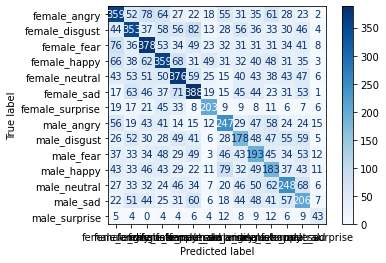

time to finish all process = 0:00:40.354920


In [ ]:
start_time = datetime.now()
model = DecisionTreeClassifier(criterion= 'gini', max_depth= None, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2, splitter= 'random')
scalar_use = StandardScaler()

pipe = Pipeline([('scaler', scalar_use), ('clf', model)])
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(pipe, X_train, y_train, cv=kfold, scoring = "accuracy")
pipe.fit(X_train, y_train)
# predict y value
y_pred_model =pipe.predict(X_test)
# classification_report
print(classification_report(y_test, y_pred_model))
# accuracy score
print(f'accuracy_score_{model}:',accuracy_score(y_test, y_pred_model))
print(f'accuracy_score_{model}: {cv_results.mean()} +/- {cv_results.std()}')
print(f"list_cross_validation_{model}:",cv_results)
# confusion_matrix
plot_confusion_matrix(pipe, X_test, y_test,cmap="Blues")
plt.show()
finish_time = datetime.now()
print("time to finish all process =",finish_time-start_time)

## LogisticRegression

### Default Parameter

                 precision    recall  f1-score   support

   female_angry       0.41      0.42      0.42       855
 female_disgust       0.46      0.47      0.47       876
    female_fear       0.41      0.39      0.40       857
   female_happy       0.42      0.38      0.40       893
 female_neutral       0.46      0.44      0.45       889
     female_sad       0.45      0.48      0.46       853
female_surprise       0.61      0.62      0.62       402
     male_angry       0.43      0.47      0.45       644
   male_disgust       0.32      0.26      0.28       652
      male_fear       0.24      0.25      0.25       659
     male_happy       0.31      0.32      0.31       661
   male_neutral       0.34      0.33      0.34       703
       male_sad       0.34      0.38      0.36       660
  male_surprise       0.53      0.54      0.53       126

       accuracy                           0.40      9730
      macro avg       0.41      0.41      0.41      9730
   weighted avg       0.40   

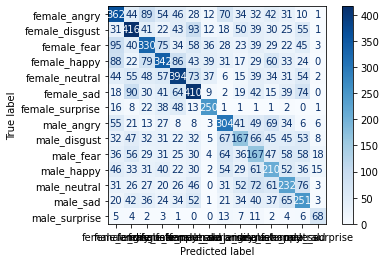

time to finish all process = 0:14:52.135896


In [ ]:
start_time = datetime.now()
model = LogisticRegression()
scalar_use = StandardScaler()


pipe = Pipeline([('scaler', scalar_use), ('clf', model)])
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(pipe, X_train, y_train, cv=kfold, scoring = "accuracy")
pipe.fit(X_train, y_train)
# predict y value
y_pred_model =pipe.predict(X_test)
# classification_report
print(classification_report(y_test, y_pred_model))
# accuracy score
print(f'accuracy_score_{model}:',accuracy_score(y_test, y_pred_model))
print(f'accuracy_score_{model}: {cv_results.mean()} +/- {cv_results.std()}')
print(f"list_cross_validation_{model}:",cv_results)
# confusion_matrix
plot_confusion_matrix(pipe, X_test, y_test,cmap="Blues")
plt.show()
finish_time = datetime.now()
print("time to finish all process =",finish_time-start_time)

### Tuning Parameter

In [ ]:
start_time = datetime.now()
model = LogisticRegression()
params = {
    'clf__penalty': ['l2','none'],
    'clf__dual': [True,False],
    'clf__fit_intercept': [True,False],
    'clf__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'clf__max_iter': [100,200,400,800],
    'clf__multi_class': ['auto','ovr','multinomial'],
}

scalar_use = StandardScaler()


pipe = Pipeline(steps=[('scaler', scalar_use), ('clf', model)])

# GridSearchCV
# param_grid= mp['params'],

random_search = RandomizedSearchCV(
  estimator = pipe,
  param_distributions= params,
  n_iter=10,
  cv=5,
)
random_search.fit(X_train,y_train)
print('best_score =', random_search.best_score_)
print('best_params =', random_search.best_params_)
print('best_estimator =', random_search.best_estimator_)

finish_time = datetime.now()
print("time to finish all process =",finish_time-start_time)

best_score = 0.8588338081671415
best_params = {'clf__solver': 'sag', 'clf__penalty': 'l2', 'clf__multi_class': 'ovr', 'clf__max_iter': 400, 'clf__fit_intercept': True, 'clf__dual': False}
best_estimator = Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LogisticRegression(max_iter=400, multi_class='ovr',
                                    solver='sag'))])
time to finish all process = 0:54:44.137406


### Evaluation Model with tuning parameter

                 precision    recall  f1-score   support

   female_angry       0.43      0.44      0.44       855
 female_disgust       0.44      0.51      0.47       876
    female_fear       0.44      0.38      0.40       857
   female_happy       0.41      0.40      0.41       893
 female_neutral       0.47      0.46      0.46       889
     female_sad       0.43      0.48      0.45       853
female_surprise       0.62      0.59      0.61       402
     male_angry       0.41      0.50      0.45       644
   male_disgust       0.32      0.27      0.29       652
      male_fear       0.28      0.26      0.27       659
     male_happy       0.31      0.30      0.30       661
   male_neutral       0.37      0.32      0.35       703
       male_sad       0.35      0.39      0.37       660
  male_surprise       0.53      0.46      0.49       126

       accuracy                           0.41      9730
      macro avg       0.41      0.41      0.41      9730
   weighted avg       0.41   

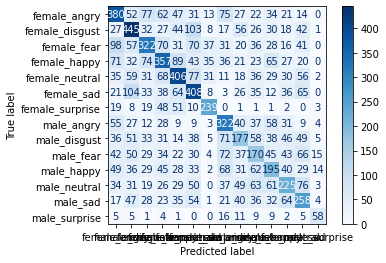

In [ ]:
start_time = datetime.now()
model = LogisticRegression(solver= 'sag', penalty= 'l2', multi_class= 'ovr', max_iter= 200, fit_intercept= True, dual= False)
scalar_use = StandardScaler()


pipe = Pipeline([('scaler', scalar_use), ('clf', model)])
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(pipe, X_train, y_train, cv=kfold, scoring = "accuracy")
pipe.fit(X_train, y_train)
# predict y value
y_pred_model =pipe.predict(X_test)
# classification_report
print(classification_report(y_test, y_pred_model))
# accuracy score
print(f'accuracy_score_{model}:',accuracy_score(y_test, y_pred_model))
print(f'accuracy_score_{model}: {cv_results.mean()} +/- {cv_results.std()}')
print(f"list_cross_validation_{model}:",cv_results)
# confusion_matrix
plot_confusion_matrix(pipe, X_test, y_test,cmap="Blues")
plt.show()
finish_time = datetime.now()
print("time to finish all process =",finish_time-start_time)

## RandomForestClassifier

### Default Parameter

                 precision    recall  f1-score   support

   female_angry       0.81      0.89      0.85       855
 female_disgust       0.70      0.86      0.77       876
    female_fear       0.88      0.75      0.81       857
   female_happy       0.84      0.82      0.83       893
 female_neutral       0.81      0.82      0.82       889
     female_sad       0.70      0.80      0.75       853
female_surprise       0.93      0.89      0.91       402
     male_angry       0.72      0.84      0.77       644
   male_disgust       0.74      0.62      0.68       652
      male_fear       0.87      0.64      0.74       659
     male_happy       0.79      0.70      0.74       661
   male_neutral       0.78      0.76      0.77       703
       male_sad       0.70      0.74      0.72       660
  male_surprise       0.92      0.63      0.75       126

       accuracy                           0.78      9730
      macro avg       0.80      0.77      0.78      9730
   weighted avg       0.79   

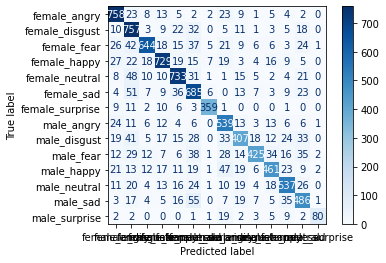

time to finish all process = 0:43:29.396761


In [ ]:
start_time = datetime.now()
model = RandomForestClassifier()
scalar_use = StandardScaler()


pipe = Pipeline([('scaler', scalar_use), ('clf', model)])
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(pipe, X_train, y_train, cv=kfold, scoring = "accuracy")
pipe.fit(X_train, y_train)
# predict y value
y_pred_model =pipe.predict(X_test)
# classification_report
print(classification_report(y_test, y_pred_model))
# accuracy score
print(f'accuracy_score_{model}:',accuracy_score(y_test, y_pred_model))
print(f'accuracy_score_{model}: {cv_results.mean()} +/- {cv_results.std()}')
print(f"list_cross_validation_{model}:",cv_results)
# confusion_matrix
plot_confusion_matrix(pipe, X_test, y_test,cmap="Blues")
plt.show()
finish_time = datetime.now()
print("time to finish all process =",finish_time-start_time)

### Tuning Parameter

In [ ]:
start_time = datetime.now()
model = RandomForestClassifier()
params = {
    'clf__n_estimators': [100,500,1000],
    'clf__max_features': ["auto", "sqrt"],
    'clf__max_depth' : [3,5,None],
    'clf__min_samples_split' : [2, 5, 10],
    'clf__min_samples_leaf' : [1, 2, 4],
    'clf__bootstrap': [True, False],
}

scalar_use = StandardScaler()


pipe = Pipeline(steps=[('scaler', scalar_use), ('clf', model)])

# GridSearchCV
# param_grid= mp['params'],

random_search = RandomizedSearchCV(
  estimator = pipe,
  param_distributions= params,
  n_iter=10,
  cv=5,
)
random_search.fit(X_train,y_train)
print('best_score =', random_search.best_score_)
print('best_params =', random_search.best_params_)
print('best_estimator =', random_search.best_estimator_)

finish_time = datetime.now()
print("time to finish all process =",finish_time-start_time)

best_score = 0.8508034188034188
best_params = {'clf__n_estimators': 500, 'clf__min_samples_split': 5, 'clf__min_samples_leaf': 1, 'clf__max_features': 'sqrt', 'clf__max_depth': None, 'clf__bootstrap': False}
best_estimator = Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 RandomForestClassifier(bootstrap=False, max_features='sqrt',
                                        min_samples_split=5,
                                        n_estimators=500))])
time to finish all process = 0:14:21.892355


### Evaluation Model with tuning parameter

time to finish all process = 5:21:00.932073
                 precision    recall  f1-score   support

   female_angry       0.89      0.92      0.91       855
 female_disgust       0.80      0.91      0.85       876
    female_fear       0.95      0.82      0.88       857
   female_happy       0.92      0.89      0.90       893
 female_neutral       0.87      0.89      0.88       889
     female_sad       0.79      0.86      0.82       853
female_surprise       0.97      0.94      0.95       402
     male_angry       0.78      0.89      0.83       644
   male_disgust       0.85      0.76      0.80       652
      male_fear       0.93      0.75      0.83       659
     male_happy       0.83      0.80      0.82       661
   male_neutral       0.83      0.85      0.84       703
       male_sad       0.78      0.83      0.80       660
  male_surprise       0.96      0.78      0.86       126

       accuracy                           0.85      9730
      macro avg       0.87      0.85      

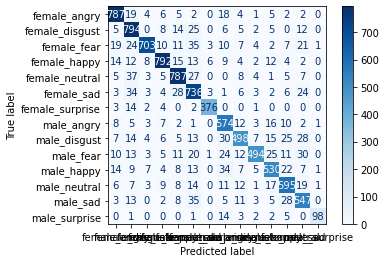

time to finish all process = 4:19:49.776518


In [ ]:
start_time = datetime.now()
model = RandomForestClassifier(n_estimators= 500, min_samples_split= 5, min_samples_leaf= 1, max_features= 'sqrt', max_depth= None, bootstrap= False)
scalar_use = StandardScaler()


pipe = Pipeline([('scaler', scalar_use), ('clf', model)])
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(pipe, X_train, y_train, cv=kfold, scoring = "accuracy")
pipe.fit(X_train, y_train)
# predict y value
y_pred_model =pipe.predict(X_test)
# classification_report
print(classification_report(y_test, y_pred_model))
# accuracy score
print(f'accuracy_score_{model}:',accuracy_score(y_test, y_pred_model))
print(f'accuracy_score_{model}: {cv_results.mean()} +/- {cv_results.std()}')
print(f"list_cross_validation_{model}:",cv_results)
# confusion_matrix
plot_confusion_matrix(pipe, X_test, y_test,cmap="Blues")
plt.show()
finish_time = datetime.now()
print("time to finish all process =",finish_time-start_time)

## KNeighborsClassifier

### Default Parameter

                 precision    recall  f1-score   support

   female_angry       0.62      0.66      0.64       855
 female_disgust       0.53      0.61      0.57       876
    female_fear       0.50      0.63      0.56       857
   female_happy       0.59      0.57      0.58       893
 female_neutral       0.57      0.64      0.61       889
     female_sad       0.46      0.70      0.56       853
female_surprise       0.88      0.70      0.78       402
     male_angry       0.61      0.49      0.54       644
   male_disgust       0.52      0.36      0.42       652
      male_fear       0.41      0.34      0.37       659
     male_happy       0.48      0.38      0.42       661
   male_neutral       0.50      0.40      0.45       703
       male_sad       0.42      0.39      0.41       660
  male_surprise       0.71      0.49      0.58       126

       accuracy                           0.54      9730
      macro avg       0.56      0.53      0.53      9730
   weighted avg       0.54   

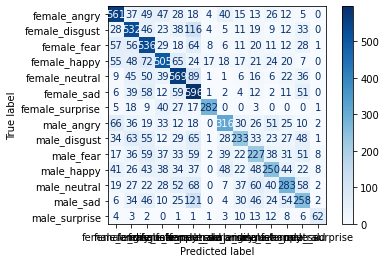

time to finish all process = 0:06:34.357653


In [ ]:
start_time = datetime.now()
model = KNeighborsClassifier()
scalar_use = StandardScaler()


pipe = Pipeline([('scaler', scalar_use), ('clf', model)])
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(pipe, X_train, y_train, cv=kfold, scoring = "accuracy")
pipe.fit(X_train, y_train)
# predict y value
y_pred_model =pipe.predict(X_test)
# classification_report
print(classification_report(y_test, y_pred_model))
# accuracy score
print(f'accuracy_score_{model}:',accuracy_score(y_test, y_pred_model))
print(f'accuracy_score_{model}: {cv_results.mean()} +/- {cv_results.std()}')
print(f"list_cross_validation_{model}:",cv_results)
# confusion_matrix
plot_confusion_matrix(pipe, X_test, y_test,cmap="Blues")
plt.show()
finish_time = datetime.now()
print("time to finish all process =",finish_time-start_time)

### Tuning Parameter

In [ ]:
start_time = datetime.now()
model = KNeighborsClassifier()
params = {
    'clf__n_neighbors': [5,7,9],
    'clf__weights': ['uniform', 'distance'],
    'clf__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'clf__p': [1,2],
}

scalar_use = StandardScaler()


pipe = Pipeline(steps=[('scaler', scalar_use), ('clf', model)])

# GridSearchCV
# param_grid= mp['params'],

random_search = RandomizedSearchCV(
  estimator = pipe,
  param_distributions= params,
  n_iter=10,
  cv=5,
)
random_search.fit(X_train,y_train)
print('best_score =', random_search.best_score_)
print('best_params =', random_search.best_params_)
print('best_estimator =', random_search.best_estimator_)

finish_time = datetime.now()
print("time to finish all process =",finish_time-start_time)

best_score = 0.684349477682811
best_params = {'clf__weights': 'distance', 'clf__p': 1, 'clf__n_neighbors': 5, 'clf__algorithm': 'brute'}
best_estimator = Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 KNeighborsClassifier(algorithm='brute', p=1,
                                      weights='distance'))])
time to finish all process = 0:02:31.743980


### Evaluation Model with tuning parameter

                 precision    recall  f1-score   support

   female_angry       0.89      0.80      0.84       855
 female_disgust       0.80      0.74      0.77       876
    female_fear       0.74      0.77      0.75       857
   female_happy       0.84      0.77      0.80       893
 female_neutral       0.79      0.79      0.79       889
     female_sad       0.62      0.84      0.71       853
female_surprise       0.94      0.88      0.91       402
     male_angry       0.81      0.72      0.76       644
   male_disgust       0.76      0.63      0.69       652
      male_fear       0.64      0.64      0.64       659
     male_happy       0.69      0.67      0.68       661
   male_neutral       0.72      0.68      0.70       703
       male_sad       0.59      0.73      0.66       660
  male_surprise       0.82      0.76      0.79       126

       accuracy                           0.75      9730
      macro avg       0.76      0.74      0.75      9730
   weighted avg       0.76   

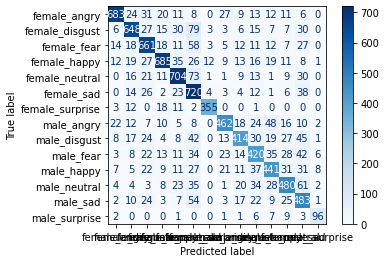

time to finish all process = 10:01:09.684815


In [ ]:
start_time = datetime.now()
model = KNeighborsClassifier(weights= 'distance', p= 1, n_neighbors= 5, algorithm= 'brute')
scalar_use = StandardScaler()


pipe = Pipeline([('scaler', scalar_use), ('clf', model)])
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(pipe, X_train, y_train, cv=kfold, scoring = "accuracy")
pipe.fit(X_train, y_train)
# predict y value
y_pred_model =pipe.predict(X_test)
# classification_report
print(classification_report(y_test, y_pred_model))
# accuracy score
print(f'accuracy_score_{model}:',accuracy_score(y_test, y_pred_model))
print(f'accuracy_score_{model}: {cv_results.mean()} +/- {cv_results.std()}')
print(f"list_cross_validation_{model}:",cv_results)
# confusion_matrix
plot_confusion_matrix(pipe, X_test, y_test,cmap="Blues")
plt.show()
finish_time = datetime.now()
print("time to finish all process =",finish_time-start_time)

## SVC

### Default Parameter

                 precision    recall  f1-score   support

   female_angry       0.58      0.63      0.60       855
 female_disgust       0.56      0.64      0.60       876
    female_fear       0.60      0.46      0.52       857
   female_happy       0.56      0.55      0.55       893
 female_neutral       0.62      0.59      0.60       889
     female_sad       0.55      0.63      0.59       853
female_surprise       0.80      0.72      0.76       402
     male_angry       0.56      0.63      0.59       644
   male_disgust       0.45      0.38      0.41       652
      male_fear       0.36      0.32      0.34       659
     male_happy       0.41      0.43      0.42       661
   male_neutral       0.51      0.49      0.50       703
       male_sad       0.41      0.48      0.44       660
  male_surprise       0.74      0.52      0.61       126

       accuracy                           0.53      9730
      macro avg       0.55      0.53      0.54      9730
   weighted avg       0.54   

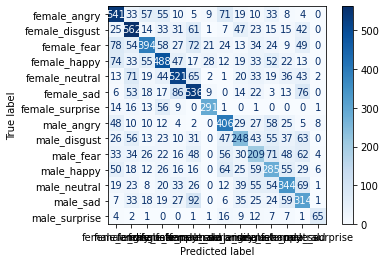

time to finish all process = 6:29:04.056414


In [ ]:
start_time = datetime.now()
model = SVC()
scalar_use = StandardScaler()


pipe = Pipeline([('scaler', scalar_use), ('clf', model)])
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(pipe, X_train, y_train, cv=kfold, scoring = "accuracy")
pipe.fit(X_train, y_train)
# predict y value
y_pred_model =pipe.predict(X_test)
# classification_report
print(classification_report(y_test, y_pred_model))
# accuracy score
print(f'accuracy_score_{model}:',accuracy_score(y_test, y_pred_model))
print(f'accuracy_score_{model}: {cv_results.mean()} +/- {cv_results.std()}')
print(f"list_cross_validation_{model}:",cv_results)
# confusion_matrix
plot_confusion_matrix(pipe, X_test, y_test,cmap="Blues")
plt.show()
finish_time = datetime.now()
print("time to finish all process =",finish_time-start_time)

### Tuning Parameter

In [ ]:
start_time = datetime.now()
model = SVC()
params = {
    'clf__gamma': ['scale','auto'],
    'clf__shrinking':[True,False],
    'clf__probability':[True,False],
    'clf__verbose':[True,False],
    'clf__decision_function_shape': ['ovo','ovr'],
    'clf__break_ties':[True,False],
}

scalar_use = StandardScaler()


pipe = Pipeline(steps=[('scaler', scalar_use), ('clf', model)])

# GridSearchCV
# param_grid= mp['params'],

random_search = RandomizedSearchCV(
  estimator = pipe,
  param_distributions= params,
  n_iter=10,
  cv=5,
)
random_search.fit(X_train,y_train)
print('best_score =', random_search.best_score_)
print('best_params =', random_search.best_params_)
print('best_estimator =', random_search.best_estimator_)

finish_time = datetime.now()
print("time to finish all process =",finish_time-start_time)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]best_score = 0.4519164292497626
best_params = {'clf__verbose': False, 'clf__shrinking': True, 'clf__probability': False, 'clf__gamma': 'auto', 'clf__decision_function_shape': 'ovr', 'clf__break_ties': True}
best_estimator = Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', SVC(break_ties=True, gamma='auto'))])
time to finish all process = 0:09:16.679410


### Evaluation Model with tuning parameter

                 precision    recall  f1-score   support

   female_angry       0.59      0.62      0.60       855
 female_disgust       0.57      0.64      0.61       876
    female_fear       0.62      0.46      0.53       857
   female_happy       0.56      0.55      0.55       893
 female_neutral       0.62      0.58      0.60       889
     female_sad       0.56      0.62      0.59       853
female_surprise       0.80      0.72      0.76       402
     male_angry       0.57      0.63      0.59       644
   male_disgust       0.44      0.38      0.41       652
      male_fear       0.36      0.32      0.33       659
     male_happy       0.40      0.44      0.42       661
   male_neutral       0.49      0.50      0.49       703
       male_sad       0.40      0.48      0.44       660
  male_surprise       0.72      0.52      0.61       126

       accuracy                           0.53      9730
      macro avg       0.55      0.53      0.54      9730
   weighted avg       0.54   

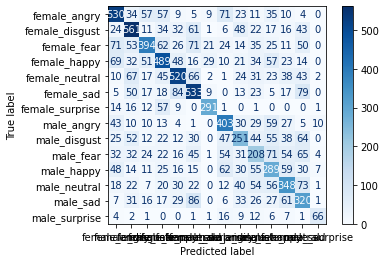

time to finish all process = 10:45:13.851082


In [ ]:
start_time = datetime.now()
model = SVC(verbose= False, shrinking= True, probability= False, gamma= 'auto', decision_function_shape= 'ovr', break_ties= True)
scalar_use = StandardScaler()


pipe = Pipeline([('scaler', scalar_use), ('clf', model)])
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(pipe, X_train, y_train, cv=kfold, scoring = "accuracy")
pipe.fit(X_train, y_train)
# predict y value
y_pred_model =pipe.predict(X_test)
# classification_report
print(classification_report(y_test, y_pred_model))
# accuracy score
print(f'accuracy_score_{model}:',accuracy_score(y_test, y_pred_model))
print(f'accuracy_score_{model}: {cv_results.mean()} +/- {cv_results.std()}')
print(f"list_cross_validation_{model}:",cv_results)
# confusion_matrix
plot_confusion_matrix(pipe, X_test, y_test,cmap="Blues")
plt.show()
finish_time = datetime.now()
print("time to finish all process =",finish_time-start_time)

## GaussianNB

### Default Parameter

                 precision    recall  f1-score   support

   female_angry       0.40      0.05      0.09       855
 female_disgust       0.47      0.03      0.06       876
    female_fear       0.39      0.11      0.18       857
   female_happy       0.07      0.05      0.06       893
 female_neutral       0.04      0.01      0.01       889
     female_sad       0.37      0.08      0.13       853
female_surprise       0.08      0.77      0.15       402
     male_angry       0.21      0.06      0.09       644
   male_disgust       0.09      0.01      0.02       652
      male_fear       0.08      0.05      0.07       659
     male_happy       0.13      0.03      0.05       661
   male_neutral       0.00      0.00      0.00       703
       male_sad       0.14      0.20      0.16       660
  male_surprise       0.04      0.91      0.08       126

       accuracy                           0.10      9730
      macro avg       0.18      0.17      0.08      9730
   weighted avg       0.20   

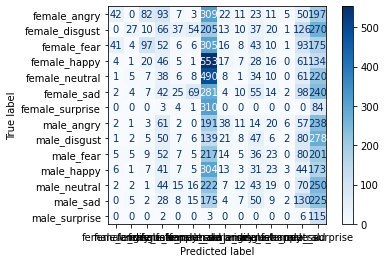

time to finish all process = 0:01:11.434673


In [ ]:
start_time = datetime.now()
model = GaussianNB()
scalar_use = StandardScaler()


pipe = Pipeline([('scaler', scalar_use), ('clf', model)])
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(pipe, X_train, y_train, cv=kfold, scoring = "accuracy")
pipe.fit(X_train, y_train)
# predict y value
y_pred_model =pipe.predict(X_test)
# classification_report
print(classification_report(y_test, y_pred_model))
# accuracy score
print(f'accuracy_score_{model}:',accuracy_score(y_test, y_pred_model))
print(f'accuracy_score_{model}: {cv_results.mean()} +/- {cv_results.std()}')
print(f"list_cross_validation_{model}:",cv_results)
# confusion_matrix
plot_confusion_matrix(pipe, X_test, y_test,cmap="Blues")
plt.show()
finish_time = datetime.now()
print("time to finish all process =",finish_time-start_time)

### Tuning Parameter

In [ ]:
start_time = datetime.now()
model = GaussianNB()
params = {
    'clf__priors':[0.1,0.5, 0.9,None],
}

scalar_use = StandardScaler()


pipe = Pipeline(steps=[('scaler', scalar_use), ('clf', model)])

# GridSearchCV
# param_grid= mp['params'],

random_search = RandomizedSearchCV(
  estimator = pipe,
  param_distributions= params,
  n_iter=10,
  cv=5,
)
random_search.fit(X_train,y_train)
print('best_score =', random_search.best_score_)
print('best_params =', random_search.best_params_)
print('best_estimator =', random_search.best_estimator_)

finish_time = datetime.now()
print("time to finish all process =",finish_time-start_time)

best_score = 0.19728584995251663
best_params = {'clf__priors': None}
best_estimator = Pipeline(steps=[('scaler', StandardScaler()), ('clf', GaussianNB())])
time to finish all process = 0:00:03.219669


### Evaluation Model with tuning parameter

                 precision    recall  f1-score   support

   female_angry       0.40      0.05      0.09       855
 female_disgust       0.47      0.03      0.06       876
    female_fear       0.39      0.11      0.18       857
   female_happy       0.07      0.05      0.06       893
 female_neutral       0.04      0.01      0.01       889
     female_sad       0.37      0.08      0.13       853
female_surprise       0.08      0.77      0.15       402
     male_angry       0.21      0.06      0.09       644
   male_disgust       0.09      0.01      0.02       652
      male_fear       0.08      0.05      0.07       659
     male_happy       0.13      0.03      0.05       661
   male_neutral       0.00      0.00      0.00       703
       male_sad       0.14      0.20      0.16       660
  male_surprise       0.04      0.91      0.08       126

       accuracy                           0.10      9730
      macro avg       0.18      0.17      0.08      9730
   weighted avg       0.20   

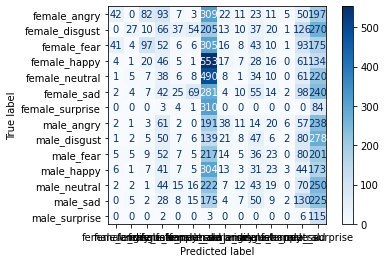

time to finish all process = 0:01:01.767015


In [ ]:
start_time = datetime.now()
model = GaussianNB(priors= None)
scalar_use = StandardScaler()


pipe = Pipeline([('scaler', scalar_use), ('clf', model)])
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(pipe, X_train, y_train, cv=kfold, scoring = "accuracy")
pipe.fit(X_train, y_train)
# predict y value
y_pred_model =pipe.predict(X_test)
# classification_report
print(classification_report(y_test, y_pred_model))
# accuracy score
print(f'accuracy_score_{model}:',accuracy_score(y_test, y_pred_model))
print(f'accuracy_score_{model}: {cv_results.mean()} +/- {cv_results.std()}')
print(f"list_cross_validation_{model}:",cv_results)
# confusion_matrix
plot_confusion_matrix(pipe, X_test, y_test,cmap="Blues")
plt.show()
finish_time = datetime.now()
print("time to finish all process =",finish_time-start_time)

## XGBClassifier

### Default Parameter

                 precision    recall  f1-score   support

   female_angry       0.47      0.56      0.51       855
 female_disgust       0.39      0.59      0.47       876
    female_fear       0.55      0.40      0.47       857
   female_happy       0.47      0.42      0.45       893
 female_neutral       0.46      0.53      0.50       889
     female_sad       0.40      0.55      0.46       853
female_surprise       0.74      0.69      0.72       402
     male_angry       0.43      0.54      0.48       644
   male_disgust       0.31      0.30      0.30       652
      male_fear       0.33      0.13      0.18       659
     male_happy       0.41      0.27      0.32       661
   male_neutral       0.54      0.33      0.41       703
       male_sad       0.35      0.38      0.36       660
  male_surprise       0.58      0.48      0.52       126

       accuracy                           0.44      9730
      macro avg       0.46      0.44      0.44      9730
   weighted avg       0.45   

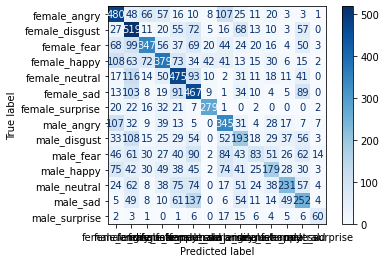

time to finish all process = 13:02:45.068707


In [ ]:
start_time = datetime.now()
model = XGBClassifier()
scalar_use = StandardScaler()


pipe = Pipeline([('scaler', scalar_use), ('clf', model)])
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(pipe, X_train, y_train, cv=kfold, scoring = "accuracy")
pipe.fit(X_train, y_train)
# predict y value
y_pred_model =pipe.predict(X_test)
# classification_report
print(classification_report(y_test, y_pred_model))
# accuracy score
print(f'accuracy_score_{model}:',accuracy_score(y_test, y_pred_model))
print(f'accuracy_score_{model}: {cv_results.mean()} +/- {cv_results.std()}')
print(f"list_cross_validation_{model}:",cv_results)
# confusion_matrix
plot_confusion_matrix(pipe, X_test, y_test,cmap="Blues")
plt.show()
finish_time = datetime.now()
print("time to finish all process =",finish_time-start_time)

### Tuning Parameter

In [ ]:
start_time = datetime.now()
model = XGBClassifier()
params = {
    'clf__max_depth': [ 3, 6, 8, 10, 12, 15 ],
    'clf__learning_rate': [ 0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
    'clf__n_estimators': [ 50, 75, 100, 125, 150 ],
    'clf__min_child_weight': [ 1, 3, 5, 7 ],
    'clf__gamma': [ 0.0, 0.1, 0.2, 0.3, 0.4 ],
    'clf__colsample_bytree': [ 0.3, 0.4, 0.5, 0.7 ] 
} 

scalar_use = StandardScaler()


pipe = Pipeline(steps=[('scaler', scalar_use), ('clf', model)])

# GridSearchCV
# param_grid= mp['params'],

random_search = RandomizedSearchCV(
  estimator = pipe,
  param_distributions= params,
  n_iter=10,
  cv=5,
)
random_search.fit(X_train,y_train)
print('best_score =', random_search.best_score_)
print('best_params =', random_search.best_params_)
print('best_estimator =', random_search.best_estimator_)

finish_time = datetime.now()
print("time to finish all process =",finish_time-start_time)

best_score = 0.8027407407407408
best_params = {'clf__n_estimators': 125, 'clf__min_child_weight': 5, 'clf__max_depth': 10, 'clf__learning_rate': 0.1, 'clf__gamma': 0.2, 'clf__colsample_bytree': 0.4}
best_estimator = Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 XGBClassifier(colsample_bytree=0.4, gamma=0.2, max_depth=10,
                               min_child_weight=5, n_estimators=125,
                               objective='multi:softprob'))])
time to finish all process = 1:49:37.024888


### Evaluation Model with tuning parameter

                 precision    recall  f1-score   support

   female_angry       0.47      0.56      0.51       855
 female_disgust       0.39      0.59      0.47       876
    female_fear       0.55      0.40      0.47       857
   female_happy       0.47      0.42      0.45       893
 female_neutral       0.46      0.53      0.50       889
     female_sad       0.40      0.55      0.46       853
female_surprise       0.74      0.69      0.72       402
     male_angry       0.43      0.54      0.48       644
   male_disgust       0.31      0.30      0.30       652
      male_fear       0.33      0.13      0.18       659
     male_happy       0.41      0.27      0.32       661
   male_neutral       0.54      0.33      0.41       703
       male_sad       0.35      0.38      0.36       660
  male_surprise       0.58      0.48      0.52       126

       accuracy                           0.44      9730
      macro avg       0.46      0.44      0.44      9730
   weighted avg       0.45   

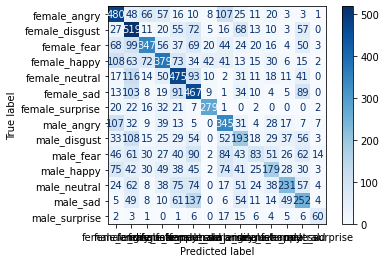

time to finish all process = 13:28:41.291004


In [ ]:
start_time = datetime.now()
model = XGBClassifier(n_estimators= 125, min_child_weight= 5, max_depth= 10, learning_rate= 0.1, gamma= 0.2, colsample_bytree= 0.4)

scalar_use = StandardScaler()


pipe = Pipeline([('scaler', scalar_use), ('clf', model)])
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(pipe, X_train, y_train, cv=kfold, scoring = "accuracy")
pipe.fit(X_train, y_train)
# predict y value
y_pred_model =pipe.predict(X_test)
# classification_report
print(classification_report(y_test, y_pred_model))
# accuracy score
print(f'accuracy_score_{model}:',accuracy_score(y_test, y_pred_model))
print(f'accuracy_score_{model}: {cv_results.mean()} +/- {cv_results.std()}')
print(f"list_cross_validation_{model}:",cv_results)
# confusion_matrix
plot_confusion_matrix(pipe, X_test, y_test,cmap="Blues")
plt.show()
finish_time = datetime.now()
print("time to finish all process =",finish_time-start_time)

## SGDClassifier

### Default Parameter

                 precision    recall  f1-score   support

   female_angry       0.33      0.47      0.39       855
 female_disgust       0.34      0.52      0.41       876
    female_fear       0.31      0.39      0.35       857
   female_happy       0.28      0.42      0.34       893
 female_neutral       0.33      0.47      0.39       889
     female_sad       0.33      0.42      0.37       853
female_surprise       0.43      0.32      0.37       402
     male_angry       0.51      0.32      0.39       644
   male_disgust       0.28      0.12      0.17       652
      male_fear       0.28      0.14      0.18       659
     male_happy       0.29      0.19      0.23       661
   male_neutral       0.39      0.16      0.23       703
       male_sad       0.37      0.17      0.24       660
  male_surprise       0.36      0.20      0.26       126

       accuracy                           0.33      9730
      macro avg       0.35      0.31      0.31      9730
   weighted avg       0.34   

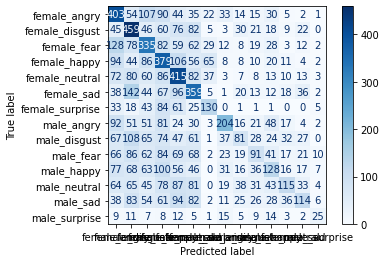

time to finish all process = 3:08:06.331904


In [ ]:
start_time = datetime.now()
model = SGDClassifier()
scalar_use = StandardScaler()


pipe = Pipeline([('scaler', scalar_use), ('clf', model)])
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(pipe, X_train, y_train, cv=kfold, scoring = "accuracy")
pipe.fit(X_train, y_train)
# predict y value
y_pred_model =pipe.predict(X_test)
# classification_report
print(classification_report(y_test, y_pred_model))
# accuracy score
print(f'accuracy_score_{model}:',accuracy_score(y_test, y_pred_model))
print(f'accuracy_score_{model}: {cv_results.mean()} +/- {cv_results.std()}')
print(f"list_cross_validation_{model}:",cv_results)
# confusion_matrix
plot_confusion_matrix(pipe, X_test, y_test,cmap="Blues")
plt.show()
finish_time = datetime.now()
print("time to finish all process =",finish_time-start_time)

### Tuning Parameter

In [ ]:
start_time = datetime.now()
model = SGDClassifier()
params = {
    'clf__penalty': ['l2', 'l1', 'elasticnet'],
    'clf__l1_ratio': [0.15,0.50,0.85],
    'clf__fit_intercept': [True,False],
    'clf__max_iter': [1000,2000,4000],
    'clf__shuffle': [True,False],
    'clf__learning_rate': ['constant','optimal','invscaling','adaptive'],
}

scalar_use = StandardScaler()


pipe = Pipeline(steps=[('scaler', scalar_use), ('clf', model)])

# GridSearchCV
# param_grid= mp['params'],

random_search = RandomizedSearchCV(
  estimator = pipe,
  param_distributions= params,
  n_iter=10,
  cv=5,
)
random_search.fit(X_train,y_train)
print('best_score =', random_search.best_score_)
print('best_params =', random_search.best_params_)
print('best_estimator =', random_search.best_estimator_)

finish_time = datetime.now()
print("time to finish all process =",finish_time-start_time)

best_score = 0.6522659069325736
best_params = {'clf__shuffle': False, 'clf__penalty': 'l2', 'clf__max_iter': 2000, 'clf__learning_rate': 'optimal', 'clf__l1_ratio': 0.15, 'clf__fit_intercept': False}
best_estimator = Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 SGDClassifier(fit_intercept=False, max_iter=2000,
                               shuffle=False))])
time to finish all process = 0:02:01.695122


### Evaluation Model with tuning parameter

                 precision    recall  f1-score   support

   female_angry       0.34      0.47      0.40       855
 female_disgust       0.35      0.50      0.41       876
    female_fear       0.28      0.42      0.34       857
   female_happy       0.31      0.40      0.35       893
 female_neutral       0.39      0.43      0.41       889
     female_sad       0.30      0.50      0.38       853
female_surprise       0.42      0.32      0.37       402
     male_angry       0.50      0.32      0.39       644
   male_disgust       0.27      0.12      0.17       652
      male_fear       0.27      0.13      0.18       659
     male_happy       0.30      0.23      0.26       661
   male_neutral       0.40      0.17      0.23       703
       male_sad       0.37      0.17      0.24       660
  male_surprise       0.37      0.21      0.26       126

       accuracy                           0.34      9730
      macro avg       0.35      0.31      0.31      9730
   weighted avg       0.34   

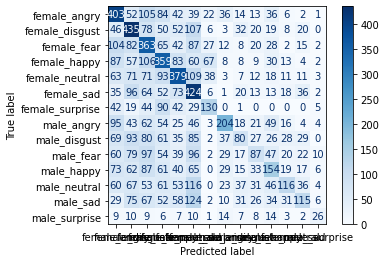

time to finish all process = 3:57:49.800716


In [ ]:
start_time = datetime.now()
model = SGDClassifier(shuffle= False, penalty= 'l2', max_iter= 2000, learning_rate= 'optimal', l1_ratio= 0.15, fit_intercept= False)
scalar_use = StandardScaler()


pipe = Pipeline([('scaler', scalar_use), ('clf', model)])
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(pipe, X_train, y_train, cv=kfold, scoring = "accuracy")
pipe.fit(X_train, y_train)
# predict y value
y_pred_model =pipe.predict(X_test)
# classification_report
print(classification_report(y_test, y_pred_model))
# accuracy score
print(f'accuracy_score_{model}:',accuracy_score(y_test, y_pred_model))
print(f'accuracy_score_{model}: {cv_results.mean()} +/- {cv_results.std()}')
print(f"list_cross_validation_{model}:",cv_results)
# confusion_matrix
plot_confusion_matrix(pipe, X_test, y_test,cmap="Blues")
plt.show()
finish_time = datetime.now()
print("time to finish all process =",finish_time-start_time)

## MLPClassifier

### Default Parameter

                 precision    recall  f1-score   support

   female_angry       0.84      0.86      0.85       855
 female_disgust       0.80      0.75      0.78       876
    female_fear       0.84      0.77      0.80       857
   female_happy       0.83      0.78      0.80       893
 female_neutral       0.76      0.88      0.82       889
     female_sad       0.79      0.83      0.81       853
female_surprise       0.91      0.90      0.91       402
     male_angry       0.82      0.78      0.80       644
   male_disgust       0.70      0.75      0.73       652
      male_fear       0.73      0.72      0.72       659
     male_happy       0.72      0.72      0.72       661
   male_neutral       0.76      0.74      0.75       703
       male_sad       0.75      0.76      0.76       660
  male_surprise       0.82      0.72      0.77       126

       accuracy                           0.79      9730
      macro avg       0.79      0.78      0.79      9730
   weighted avg       0.79   

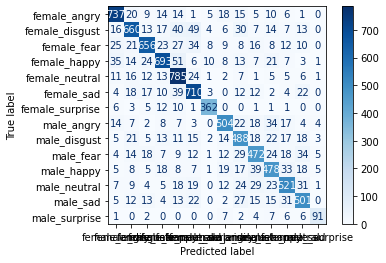

time to finish all process = 1:06:11.942905


In [ ]:
start_time = datetime.now()
model = MLPClassifier()
scalar_use = StandardScaler()


pipe = Pipeline([('scaler', scalar_use), ('clf', model)])
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(pipe, X_train, y_train, cv=kfold, scoring = "accuracy")
pipe.fit(X_train, y_train)
# predict y value
y_pred_model =pipe.predict(X_test)
# classification_report
print(classification_report(y_test, y_pred_model))
# accuracy score
print(f'accuracy_score_{model}:',accuracy_score(y_test, y_pred_model))
print(f'accuracy_score_{model}: {cv_results.mean()} +/- {cv_results.std()}')
print(f"list_cross_validation_{model}:",cv_results)
# confusion_matrix
plot_confusion_matrix(pipe, X_test, y_test,cmap="Blues")
plt.show()
finish_time = datetime.now()
print("time to finish all process =",finish_time-start_time)

### Tuning Parameter

In [ ]:
start_time = datetime.now()
model = MLPClassifier()
params = {
    'clf__activation': ['identity', 'logistic', 'tanh', 'relu'],
    'clf__solver': ['lbfgs', 'sgd', 'adam'],
    'clf__power_t': [0.1,0.5,0.8],
    'clf__max_iter': [200,800,1600],
}

scalar_use = StandardScaler()


pipe = Pipeline(steps=[('scaler', scalar_use), ('clf', model)])

# GridSearchCV
# param_grid= mp['params'],

random_search = RandomizedSearchCV(
  estimator = pipe,
  param_distributions= params,
  n_iter=10,
  cv=5,
)
random_search.fit(X_train,y_train)
print('best_score =', random_search.best_score_)
print('best_params =', random_search.best_params_)
print('best_estimator =', random_search.best_estimator_)

finish_time = datetime.now()
print("time to finish all process =",finish_time-start_time)

best_score = 0.8600550807217473
best_params = {'clf__solver': 'adam', 'clf__power_t': 0.8, 'clf__max_iter': 800, 'clf__activation': 'relu'}
best_estimator = Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', MLPClassifier(max_iter=800, power_t=0.8))])
time to finish all process = 0:30:01.386304


### Evaluation Model with tuning parameter

                 precision    recall  f1-score   support

   female_angry       0.87      0.87      0.87       855
 female_disgust       0.81      0.85      0.83       876
    female_fear       0.83      0.80      0.81       857
   female_happy       0.86      0.83      0.85       893
 female_neutral       0.87      0.87      0.87       889
     female_sad       0.85      0.83      0.84       853
female_surprise       0.91      0.91      0.91       402
     male_angry       0.82      0.80      0.81       644
   male_disgust       0.79      0.70      0.74       652
      male_fear       0.76      0.76      0.76       659
     male_happy       0.75      0.81      0.78       661
   male_neutral       0.79      0.82      0.80       703
       male_sad       0.75      0.80      0.78       660
  male_surprise       0.78      0.80      0.79       126

       accuracy                           0.82      9730
      macro avg       0.82      0.82      0.82      9730
   weighted avg       0.82   

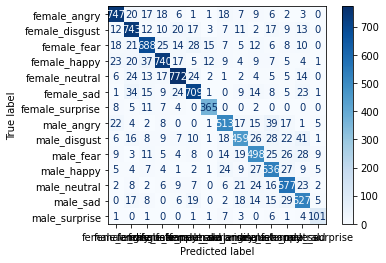

time to finish all process = 1:40:36.671531


In [ ]:
start_time = datetime.now()
model = MLPClassifier(solver= 'adam', power_t= 0.8, max_iter= 800, activation= 'relu')
scalar_use = StandardScaler()


pipe = Pipeline([('scaler', scalar_use), ('clf', model)])
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(pipe, X_train, y_train, cv=kfold, scoring = "accuracy")
pipe.fit(X_train, y_train)
# predict y value
y_pred_model =pipe.predict(X_test)
# classification_report
print(classification_report(y_test, y_pred_model))
# accuracy score
print(f'accuracy_score_{model}:',accuracy_score(y_test, y_pred_model))
print(f'accuracy_score_{model}: {cv_results.mean()} +/- {cv_results.std()}')
print(f"list_cross_validation_{model}:",cv_results)
# confusion_matrix
plot_confusion_matrix(pipe, X_test, y_test,cmap="Blues")
plt.show()
finish_time = datetime.now()
print("time to finish all process =",finish_time-start_time)

# Deep Learnning

# train_test_split_deep_learning

In [ ]:
# df['gender'].map(lambda x: str(x)) + df.map(lambda x: str(x) + '_')
df['labels'] = df['gender'].map(lambda x: str(x) + '_') + df['emotion'].map(lambda x: str(x))
df = df.drop(labels=["emotion","gender"], axis=1)
df

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,labels
0,0.260742,0.312500,0.312500,0.185059,0.130371,0.191406,0.305176,0.326660,0.319824,0.284180,...,-4.222076,0.154335,-1.792320,1.812561,0.974394,1.651097,9.140385,7.712218,7.271248,female_neutral
1,0.185547,0.232422,0.234375,0.148926,0.111816,0.153320,0.239746,0.270020,0.268066,0.261719,...,-3.848477,-0.647539,1.711680,0.456879,1.471922,2.502895,8.246724,8.931411,6.114696,female_neutral
2,0.086914,0.110352,0.110352,0.049805,0.041016,0.043457,0.091797,0.121582,0.181152,0.239746,...,1.513948,4.273255,6.451339,7.631994,6.305041,4.076422,1.346368,2.032737,8.031541,female_neutral
3,0.236816,0.349609,0.453125,0.408691,0.395508,0.400391,0.411621,0.442383,0.452148,0.443848,...,0.100280,-0.378162,-1.569095,5.468384,9.043862,2.246045,2.142469,1.344615,-0.131994,female_neutral
4,0.136719,0.208008,0.271973,0.267090,0.257324,0.247070,0.251953,0.243164,0.197266,0.179199,...,-4.276752,1.275351,11.402136,6.619304,-6.211828,-7.745015,4.286483,15.148426,14.956486,female_sad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48643,0.062012,0.075684,0.096680,0.069824,0.052734,0.053711,0.044434,0.041992,0.044922,0.041504,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,female_disgust
48644,0.075195,0.095703,0.114258,0.096680,0.079590,0.069824,0.054688,0.041992,0.042969,0.043945,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,female_disgust
48645,0.076172,0.096680,0.115234,0.097656,0.080566,0.069824,0.054688,0.041992,0.041992,0.043945,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,female_disgust
48646,0.082031,0.134277,0.160156,0.136230,0.122559,0.101074,0.099609,0.102051,0.093262,0.077637,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,female_disgust


In [ ]:
# df = df[:1000]

In [ ]:
X = df.drop(labels="labels", axis=1)
y = df["labels"]

In [ ]:
label_encoder = LabelEncoder()
y = np_utils.to_categorical(label_encoder.fit_transform(y))
y,label_encoder.classes_

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]], dtype=float32),
 array(['female_angry', 'female_disgust', 'female_fear', 'female_happy',
        'female_neutral', 'female_sad', 'female_surprise', 'male_angry',
        'male_disgust', 'male_fear', 'male_happy', 'male_neutral',
        'male_sad', 'male_surprise'], dtype=object))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=300, test_size=0.2)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=300, test_size=0.1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((38918, 2376), (9730, 2376), (38918, 14), (9730, 14))

In [ ]:
standard_scaler = StandardScaler()
X_train_scalar = standard_scaler.fit_transform(X_train)
X_test_scalar = standard_scaler.transform(X_test)
X_train_scalar.shape, X_test_scalar.shape, y_train.shape, y_test.shape

((38918, 2376), (9730, 2376), (38918, 14), (9730, 14))

In [ ]:
X_train_scalar = np.expand_dims(X_train_scalar, axis=2)
X_test_scalar = np.expand_dims(X_test_scalar, axis=2)
X_train_scalar.shape,X_test_scalar.shape

((38918, 2376, 1), (9730, 2376, 1))

In [ ]:
early_stop = EarlyStopping(patience = 7, restore_best_weights = True, mode = 'auto', monitor ="val_acc" )

In [ ]:
lr_reduction = ReduceLROnPlateau(patience=5,min_lr=0.00001, factor=0.5, verbose=1,monitor='val_acc')

In [ ]:
# import keras library
from keras import backend as KB

# create recall metric function
def recall_model(y_true, y_pred):
    true_positives = KB.sum(KB.round(KB.clip(y_true * y_pred, 0, 1)))
    possible_positives = KB.sum(KB.round(KB.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + KB.epsilon())
    return recall

# create precision metric function
def precision_model(y_true, y_pred):
    true_positives = KB.sum(KB.round(KB.clip(y_true * y_pred, 0, 1)))
    predicted_positives = KB.sum(KB.round(KB.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + KB.epsilon())
    return precision

# create f1-score metric function
def f1_model(y_true, y_pred):
    precision = precision_model(y_true, y_pred)
    recall = recall_model(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+KB.epsilon()))

# CNN

## Train model

In [ ]:
cnn_model = models.Sequential()

cnn_model.add(layers.Conv1D(512, strides = 1, kernel_size = 5, padding = "same", activation = "relu", input_shape = (X_train_scalar.shape[1], 1)))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPool1D(strides = 2, pool_size = 5, padding = "same"))

cnn_model.add(layers.Conv1D(512, strides = 1, kernel_size = 5, padding = "same", activation = "relu"))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPool1D(strides = 2, pool_size = 5, padding = "same"))

cnn_model.add(layers.Conv1D(256, strides = 1, kernel_size = 5, padding = "same", activation = "relu"))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPool1D(strides = 2, pool_size = 5, padding = "same"))

cnn_model.add(layers.Conv1D(256, strides = 1, kernel_size = 3, padding = 'same', activation = 'relu'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPooling1D(strides = 2, pool_size = 5, padding = 'same'))

cnn_model.add(layers.Conv1D(128, strides = 1, kernel_size = 3, padding = 'same', activation = 'relu'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPooling1D(strides = 2, pool_size = 3, padding = 'same'))

cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(512, activation = 'relu'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Dense(14, activation = "softmax"))

cnn_model.compile(optimizer = "rmsprop", loss = "categorical_crossentropy", metrics = ["acc", f1_model, recall_model, precision_model])
cnn_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 2376, 512)         3072      
                                                                 
 batch_normalization_6 (Batc  (None, 2376, 512)        2048      
 hNormalization)                                                 
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 1188, 512)        0         
 1D)                                                             
                                                                 
 conv1d_6 (Conv1D)           (None, 1188, 512)         1311232   
                                                                 
 batch_normalization_7 (Batc  (None, 1188, 512)        2048      
 hNormalization)                                                 
                                                      

In [ ]:
cnn_history = cnn_model.fit(X_train_scalar, y_train, 
                        validation_data=(X_test_scalar, y_test),
                        callbacks=[early_stop, lr_reduction],
                        epochs=50, batch_size=32)

Epoch 1/50
1217/1217 [==============================] - 214s 174ms/step - loss: 1.7453 - acc: 0.4126 - f1_model: 0.3549 - recall_model: 0.2575 - precision_model: 0.6018 - val_loss: 1.5394 - val_acc: 0.4619 - val_f1_model: 0.4160 - val_recall_model: 0.3128 - val_precision_model: 0.6342 - lr: 0.0010
Epoch 2/50
1217/1217 [==============================] - 211s 173ms/step - loss: 1.2216 - acc: 0.5657 - f1_model: 0.5282 - recall_model: 0.4174 - precision_model: 0.7300 - val_loss: 1.3049 - val_acc: 0.5396 - val_f1_model: 0.5265 - val_recall_model: 0.4211 - val_precision_model: 0.7116 - lr: 0.0010
Epoch 3/50
1217/1217 [==============================] - 210s 173ms/step - loss: 0.9729 - acc: 0.6513 - f1_model: 0.6324 - recall_model: 0.5350 - precision_model: 0.7798 - val_loss: 1.0473 - val_acc: 0.6396 - val_f1_model: 0.6222 - val_recall_model: 0.5415 - val_precision_model: 0.7354 - lr: 0.0010
Epoch 4/50
1217/1217 [==============================] - 210s 173ms/step - loss: 0.7430 - acc: 0.7367 - 

## Metric

In [ ]:
# Display loss, accuracy, f1-score, precision, recall metrics with evaluate function to see the model performance
score_metric = cnn_model.evaluate(X_test_scalar, y_test)
print(score_metric)
print('test_loss:', score_metric[0])
print('test_accuracy:', score_metric[1])
print('test_f1:', score_metric[2])
print('test_precision:', score_metric[3])
print('test_recall:', score_metric[4])

305/305 [==============================] - 14s 46ms/step - loss: 0.1652 - acc: 0.9696 - f1_model: 0.9699 - recall_model: 0.9689 - precision_model: 0.9710
[0.16523002088069916, 0.9695786237716675, 0.9698851704597473, 0.9688524603843689, 0.9709512591362]
test_loss: 0.16523002088069916
test_accuracy: 0.9695786237716675
test_f1: 0.9698851704597473
test_precision: 0.9688524603843689
test_recall: 0.9709512591362


In [ ]:
cnn_history.history

{'loss': [1.74534273147583,
  1.221600890159607,
  0.9729289412498474,
  0.742960512638092,
  0.5271989703178406,
  0.3699025809764862,
  0.26797252893447876,
  0.1983816772699356,
  0.15621019899845123,
  0.1275816708803177,
  0.11339883506298065,
  0.10001517087221146,
  0.08120587468147278,
  0.07621704041957855,
  0.07128459215164185,
  0.06214136257767677,
  0.06113268435001373,
  0.0548207052052021,
  0.05493825301527977,
  0.052000492811203,
  0.045811548829078674,
  0.04870850592851639,
  0.04619452729821205,
  0.04538307338953018,
  0.03894065320491791,
  0.0426945686340332,
  0.040563538670539856,
  0.036871958523988724,
  0.03298979625105858,
  0.03352527320384979,
  0.03614996746182442,
  0.03285392373800278,
  0.029445001855492592,
  0.03171202167868614,
  0.03026985004544258,
  0.030919499695301056,
  0.02863284759223461,
  0.0299542136490345,
  0.027798868715763092,
  0.02812284789979458,
  0.026131607592105865,
  0.023932620882987976,
  0.01159875188022852,
  0.00711574

In [ ]:
from sklearn.metrics import roc_auc_score
predition = cnn_model.predict(X_test_scalar)
y_pred = np.round(predition)
print(y_pred)
auc = roc_auc_score(y_pred, y_test)
print("AUC: {:.2%}".format (auc))

305/305 [==============================] - 14s 45ms/step
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
AUC: 98.28%


## virtualization

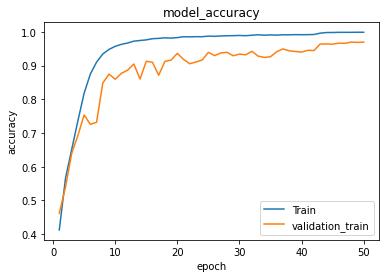

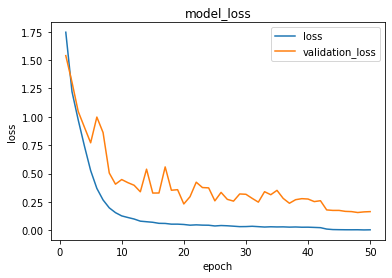

In [ ]:
# visualization 50 epoch
total_epoch = range(1,len(cnn_history.history['loss'])+1)


# compare f1-score metric and val_accuracy in every epoch
plt.plot(total_epoch,cnn_history.history['acc'])
plt.plot(total_epoch,cnn_history.history['val_acc'])
plt.title('model_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','validation_train'])
plt.show()

# compare loss and val_accuracy in every epoch
plt.plot(total_epoch,cnn_history.history['loss'])
plt.plot(total_epoch,cnn_history.history['val_loss'])
plt.title('model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss','validation_loss'])
plt.show()


In [ ]:
y_predicion = cnn_model.predict(X_test_scalar)
y_predicion = np.argmax(y_predicion, axis=1)
y_predicion

305/305 [==============================] - 14s 46ms/step


array([ 0,  5,  0, ...,  3, 12,  1])

In [ ]:
y_result = np.argmax(y_test, axis=1)
y_result

array([ 0,  5,  0, ...,  3, 12,  1])

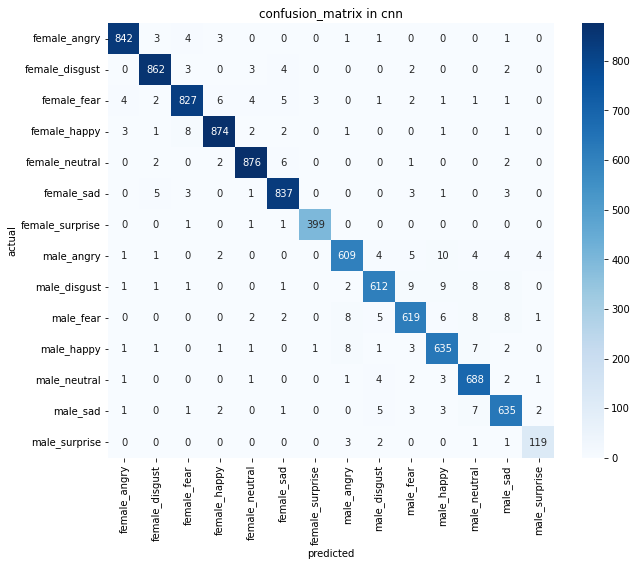

In [ ]:
list_emotion = ['female_angry',
 'female_disgust',
 'female_fear',
 'female_happy',
 'female_neutral',
 'female_sad',
 'female_surprise',
 'male_angry',
 'male_disgust',
 'male_fear',
 'male_happy',
 'male_neutral',
 'male_sad',
 'male_surprise'
]


matrix = confusion_matrix(y_true=y_result, y_pred=y_predicion)
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, xticklabels=list_emotion, yticklabels=list_emotion, cmap="Blues", annot=True, fmt="d")
plt.title("confusion_matrix in cnn")
plt.ylabel('actual')
plt.xlabel('predicted')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       855
           1       0.98      0.98      0.98       876
           2       0.98      0.96      0.97       857
           3       0.98      0.98      0.98       893
           4       0.98      0.99      0.98       889
           5       0.98      0.98      0.98       853
           6       0.99      0.99      0.99       402
           7       0.96      0.94      0.95       644
           8       0.97      0.94      0.95       652
           9       0.96      0.94      0.95       659
          10       0.95      0.96      0.96       661
          11       0.95      0.98      0.96       703
          12       0.95      0.96      0.96       660
          13       0.94      0.94      0.94       126

   micro avg       0.97      0.97      0.97      9730
   macro avg       0.97      0.97      0.97      9730
weighted avg       0.97      0.97      0.97      9730
 samples avg       0.97   

In [ ]:
# show accuracy in convolution neural network 
print(f'accuracy_score:',accuracy_score(y_test, y_pred))

accuracy_score: 0.9687564234326824


## predict_data

## save model

In [ ]:
cnn_model.save("/content/drive/MyDrive/essex_university/dissertation/assignment_two/code_v3/gender_emotion/cnn_model.h5")
print("save completed")

save completed


In [ ]:
test_model = keras.models.load_model('/content/drive/MyDrive/essex_university/dissertation/assignment_two/code_v3/gender_emotion/cnn_model.h5',custom_objects={"f1_model": f1_model,"recall_model":recall_model,"precision_model":precision_model })
print("load_completed")


load_completed


In [ ]:
test = test_model.predict(X_test_scalar)
test = np.argmax(test, axis=1)
test

305/305 [==============================] - 14s 45ms/step


array([ 0,  5,  0, ...,  3, 12,  1])

# CNN epoch 150

## Train model

In [ ]:
cnn_model = models.Sequential()

cnn_model.add(layers.Conv1D(512, strides = 1, kernel_size = 5, padding = "same", activation = "relu", input_shape = (X_train_scalar.shape[1], 1)))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPool1D(strides = 2, pool_size = 5, padding = "same"))

cnn_model.add(layers.Conv1D(512, strides = 1, kernel_size = 5, padding = "same", activation = "relu"))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPool1D(strides = 2, pool_size = 5, padding = "same"))

cnn_model.add(layers.Conv1D(256, strides = 1, kernel_size = 5, padding = "same", activation = "relu"))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPool1D(strides = 2, pool_size = 5, padding = "same"))

cnn_model.add(layers.Conv1D(256, strides = 1, kernel_size = 3, padding = 'same', activation = 'relu'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPooling1D(strides = 2, pool_size = 5, padding = 'same'))

cnn_model.add(layers.Conv1D(128, strides = 1, kernel_size = 3, padding = 'same', activation = 'relu'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPooling1D(strides = 2, pool_size = 3, padding = 'same'))

cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(512, activation = 'relu'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Dense(14, activation = "softmax"))

cnn_model.compile(optimizer = "rmsprop", loss = "categorical_crossentropy", metrics = ["acc", f1_model, recall_model, precision_model])
cnn_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2376, 512)         3072      
                                                                 
 batch_normalization (BatchN  (None, 2376, 512)        2048      
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1188, 512)        0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 1188, 512)         1311232   
                                                                 
 batch_normalization_1 (Batc  (None, 1188, 512)        2048      
 hNormalization)                                                 
                                                        

In [ ]:
cnn_history = cnn_model.fit(X_train_scalar, y_train, 
                        validation_data=(X_test_scalar, y_test),
                        callbacks=[early_stop, lr_reduction],
                        epochs=150, batch_size=32)

Epoch 1/150
1217/1217 [==============================] - 221s 173ms/step - loss: 1.7371 - acc: 0.4152 - f1_model: 0.3551 - recall_model: 0.2550 - precision_model: 0.6130 - val_loss: 2.5828 - val_acc: 0.3598 - val_f1_model: 0.3521 - val_recall_model: 0.2865 - val_precision_model: 0.4620 - lr: 0.0010
Epoch 2/150
1217/1217 [==============================] - 211s 173ms/step - loss: 1.1935 - acc: 0.5749 - f1_model: 0.5367 - recall_model: 0.4246 - precision_model: 0.7407 - val_loss: 1.2644 - val_acc: 0.5600 - val_f1_model: 0.5458 - val_recall_model: 0.4488 - val_precision_model: 0.7038 - lr: 0.0010
Epoch 3/150
1217/1217 [==============================] - 211s 173ms/step - loss: 0.9433 - acc: 0.6644 - f1_model: 0.6451 - recall_model: 0.5496 - precision_model: 0.7870 - val_loss: 1.0200 - val_acc: 0.6406 - val_f1_model: 0.6206 - val_recall_model: 0.5293 - val_precision_model: 0.7555 - lr: 0.0010
Epoch 4/150
1217/1217 [==============================] - 211s 173ms/step - loss: 0.7039 - acc: 0.754

## Metric

In [ ]:
# Display loss, accuracy, f1-score, precision, recall metrics with evaluate function to see the model performance
score_metric = cnn_model.evaluate(X_test_scalar, y_test)
print(score_metric)
print('test_loss:', score_metric[0])
print('test_accuracy:', score_metric[1])
print('test_f1:', score_metric[2])
print('test_precision:', score_metric[3])
print('test_recall:', score_metric[4])

305/305 [==============================] - 14s 46ms/step - loss: 0.1620 - acc: 0.9742 - f1_model: 0.9746 - recall_model: 0.9737 - precision_model: 0.9756
[0.1620042473077774, 0.9742034673690796, 0.9746372699737549, 0.9736680388450623, 0.9756379723548889]
test_loss: 0.1620042473077774
test_accuracy: 0.9742034673690796
test_f1: 0.9746372699737549
test_precision: 0.9736680388450623
test_recall: 0.9756379723548889


In [ ]:
cnn_history.history

{'loss': [1.7370575666427612,
  1.1934921741485596,
  0.9433286786079407,
  0.7039235830307007,
  0.4986611604690552,
  0.3439820408821106,
  0.24810940027236938,
  0.1891702562570572,
  0.149971142411232,
  0.1164294108748436,
  0.10665537416934967,
  0.09380421042442322,
  0.08294637501239777,
  0.07684390246868134,
  0.06962452828884125,
  0.0647876188158989,
  0.06030619889497757,
  0.05614940822124481,
  0.0532984621822834,
  0.05003315582871437,
  0.04974009469151497,
  0.046405669301748276,
  0.04350434988737106,
  0.04202907532453537,
  0.03972814604640007,
  0.03720982372760773,
  0.03712010383605957,
  0.03674925118684769,
  0.03615278750658035,
  0.015445299446582794,
  0.009168095886707306,
  0.007508371956646442,
  0.00676535302773118,
  0.006857533007860184,
  0.005467996932566166,
  0.005903379060328007,
  0.0047125970013439655,
  0.00486488314345479,
  0.006271447986364365,
  0.005627918988466263,
  0.0027520975563675165,
  0.0023913986515253782,
  0.001662534661591053,

In [ ]:
from sklearn.metrics import roc_auc_score
predition = cnn_model.predict(X_test_scalar)
y_pred = np.round(predition)
print(y_pred)
auc = roc_auc_score(y_pred, y_test)
print("AUC: {:.2%}".format (auc))

305/305 [==============================] - 14s 44ms/step
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
AUC: 98.46%


## virtualization

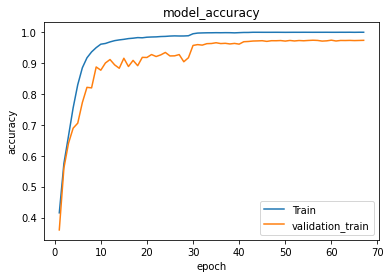

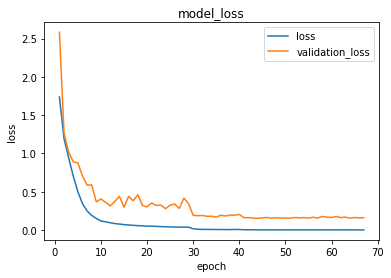

In [ ]:
# visualization 50 epoch
total_epoch = range(1,len(cnn_history.history['loss'])+1)


# compare f1-score metric and val_accuracy in every epoch
plt.plot(total_epoch,cnn_history.history['acc'])
plt.plot(total_epoch,cnn_history.history['val_acc'])
plt.title('model_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','validation_train'])
plt.show()

# compare loss and val_accuracy in every epoch
plt.plot(total_epoch,cnn_history.history['loss'])
plt.plot(total_epoch,cnn_history.history['val_loss'])
plt.title('model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss','validation_loss'])
plt.show()


In [ ]:
y_predicion = cnn_model.predict(X_test_scalar)
y_predicion = np.argmax(y_predicion, axis=1)
y_predicion

305/305 [==============================] - 13s 44ms/step


array([ 0,  5,  0, ...,  3, 12,  1])

In [ ]:
y_result = np.argmax(y_test, axis=1)
y_result

array([ 0,  5,  0, ...,  3, 12,  1])

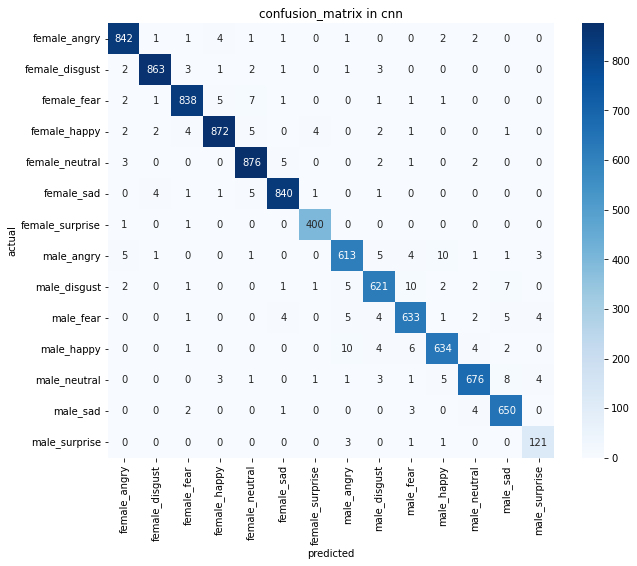

In [ ]:
list_emotion = ['female_angry',
 'female_disgust',
 'female_fear',
 'female_happy',
 'female_neutral',
 'female_sad',
 'female_surprise',
 'male_angry',
 'male_disgust',
 'male_fear',
 'male_happy',
 'male_neutral',
 'male_sad',
 'male_surprise'
]


matrix = confusion_matrix(y_true=y_result, y_pred=y_predicion)
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, xticklabels=list_emotion, yticklabels=list_emotion, cmap="Blues", annot=True, fmt="d")
plt.title("confusion_matrix in cnn")
plt.ylabel('actual')
plt.xlabel('predicted')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       855
           1       0.99      0.98      0.99       876
           2       0.98      0.98      0.98       857
           3       0.99      0.98      0.98       893
           4       0.98      0.99      0.98       889
           5       0.98      0.98      0.98       853
           6       0.98      1.00      0.99       402
           7       0.96      0.95      0.96       644
           8       0.96      0.95      0.96       652
           9       0.96      0.96      0.96       659
          10       0.97      0.96      0.96       661
          11       0.98      0.96      0.97       703
          12       0.97      0.98      0.97       660
          13       0.92      0.96      0.94       126

   micro avg       0.98      0.97      0.97      9730
   macro avg       0.97      0.97      0.97      9730
weighted avg       0.98      0.97      0.97      9730
 samples avg       0.97   

In [ ]:
# show accuracy in convolution neural network 
print(f'accuracy_score:',accuracy_score(y_test, y_pred))

accuracy_score: 0.9735868448098663


## predict_data

## save model

In [ ]:
cnn_model.save("/content/drive/MyDrive/essex_university/dissertation/assignment_two/code_v3/gender_emotion/cnn_modelv2.h5")
print("save completed")

save completed


In [ ]:
test_model = keras.models.load_model('/content/drive/MyDrive/essex_university/dissertation/assignment_two/code_v3/gender_emotion/cnn_modelv2.h5',custom_objects={"f1_model": f1_model,"recall_model":recall_model,"precision_model":precision_model })
print("load_completed")


load_completed


In [ ]:
test = test_model.predict(X_test_scalar)
test = np.argmax(test, axis=1)
test

305/305 [==============================] - 14s 44ms/step


array([ 0,  5,  0, ...,  3, 12,  1])

# LSTM

## Train model

In [ ]:
lstm_model = Sequential()
# First layer
lstm_model.add(LSTM(units=128, return_sequences=True, input_shape=(X_train_scalar.shape[1],1)))
lstm_model.add(Dropout(0.2))
# Second layer
lstm_model.add(LSTM(units=128, return_sequences=True))
lstm_model.add(Dropout(0.2))
# Third layer
lstm_model.add(LSTM(units=64, return_sequences=True))
lstm_model.add(Dropout(0.2))
# Fourth layer
lstm_model.add(LSTM(units=64, return_sequences=True))
lstm_model.add(Dropout(0.2))

# # fifth layer
lstm_model.add(LSTM(units=64, return_sequences=True))
lstm_model.add(Dropout(0.2))

# The output layer
# lstm_model.add(Dense(units=1))

# lstm_model.add(layers.Dense(7, activation = "softmax"))

lstm_model.add(layers.Flatten())
lstm_model.add(layers.Dense(128, activation = 'relu'))
lstm_model.add(layers.BatchNormalization())
lstm_model.add(layers.Dense(14, activation = "softmax"))

# complie the RNN
lstm_model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics = ["acc", f1_model, recall_model, precision_model])

# lstm_model.compile(optimizer='rmsprop',loss='mean_squared_error',metrics = ["acc", f1_model, recall_model, precision_model])
# cnn_model.compile(optimizer = "rmsprop", loss = "categorical_crossentropy", metrics = ["acc", f1_model, recall_model, precision_model])


lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2376, 128)         66560     
                                                                 
 dropout (Dropout)           (None, 2376, 128)         0         
                                                                 
 lstm_1 (LSTM)               (None, 2376, 128)         131584    
                                                                 
 dropout_1 (Dropout)         (None, 2376, 128)         0         
                                                                 
 lstm_2 (LSTM)               (None, 2376, 64)          49408     
                                                                 
 dropout_2 (Dropout)         (None, 2376, 64)          0         
                                                                 
 lstm_3 (LSTM)               (None, 2376, 64)          3

In [ ]:
# Fitting to the training set
# lstm_model.fit(X_train_scalar,y_train,epochs=50,batch_size=64)

lstm_history = lstm_model.fit(X_train_scalar, y_train, 
                        validation_data=(X_test_scalar, y_test),
                        callbacks=[early_stop, lr_reduction],
                        epochs=50, batch_size=32)

Epoch 1/50
1217/1217 [==============================] - 507s 405ms/step - loss: 2.1054 - acc: 0.2781 - f1_model: 0.1808 - recall_model: 0.1097 - precision_model: 0.6035 - val_loss: 1.7543 - val_acc: 0.3996 - val_f1_model: 0.3362 - val_recall_model: 0.2228 - val_precision_model: 0.7192 - lr: 0.0010
Epoch 2/50
1217/1217 [==============================] - 502s 412ms/step - loss: 1.5182 - acc: 0.4759 - f1_model: 0.4124 - recall_model: 0.2855 - precision_model: 0.7779 - val_loss: 1.6038 - val_acc: 0.4663 - val_f1_model: 0.4404 - val_recall_model: 0.3288 - val_precision_model: 0.6820 - lr: 0.0010
Epoch 3/50
1217/1217 [==============================] - 504s 414ms/step - loss: 1.1255 - acc: 0.6149 - f1_model: 0.5808 - recall_model: 0.4568 - precision_model: 0.8119 - val_loss: 1.3407 - val_acc: 0.5637 - val_f1_model: 0.5616 - val_recall_model: 0.4645 - val_precision_model: 0.7167 - lr: 0.0010
Epoch 4/50
1217/1217 [==============================] - 505s 415ms/step - loss: 0.7506 - acc: 0.7504 - 

## Metric

In [ ]:
# Display loss, accuracy, f1-score, precision, recall metrics with evaluate function to see the model performance
score_metric = lstm_model.evaluate(X_test_scalar, y_test)
print(score_metric)
print('test_loss:', score_metric[0])
print('test_accuracy:', score_metric[1])
print('test_f1:', score_metric[2])
print('test_precision:', score_metric[3])
print('test_recall:', score_metric[4])

305/305 [==============================] - 50s 162ms/step - loss: 0.3350 - acc: 0.9418 - f1_model: 0.9425 - recall_model: 0.9403 - precision_model: 0.9447
[0.3350048363208771, 0.9418293833732605, 0.9424534440040588, 0.9402663707733154, 0.9447178840637207]
test_loss: 0.3350048363208771
test_accuracy: 0.9418293833732605
test_f1: 0.9424534440040588
test_precision: 0.9402663707733154
test_recall: 0.9447178840637207


In [ ]:
lstm_history.history

{'loss': [2.105398654937744,
  1.5181593894958496,
  1.1254515647888184,
  0.7506112456321716,
  0.4385744333267212,
  0.2519453465938568,
  0.15613536536693573,
  0.11059100180864334,
  0.08409927785396576,
  0.07320856302976608,
  0.0641343742609024,
  0.05390308424830437,
  0.051035426557064056,
  0.04757116734981537,
  0.040987879037857056,
  0.039525751024484634,
  0.0387880802154541,
  0.03600557893514633,
  0.03286731243133545,
  0.030984407290816307,
  0.031044840812683105,
  0.0299388337880373,
  0.029639385640621185,
  0.028186295181512833,
  0.02953065186738968,
  0.022392304614186287,
  0.025175679475069046,
  0.026222318410873413,
  0.021071692928671837,
  0.02184245176613331,
  0.02603500708937645,
  0.022028490900993347,
  0.008104011416435242,
  0.00586357805877924,
  0.004909226205199957,
  0.004466983489692211,
  0.0029627725016325712,
  0.0027707486879080534,
  0.0027356967329978943,
  0.0025279931724071503,
  0.0028400493320077658,
  0.0021577223669737577,
  0.00276

In [ ]:
from sklearn.metrics import roc_auc_score
predition = lstm_model.predict(X_test_scalar)
y_pred = np.round(predition)
print(y_pred)
auc = roc_auc_score(y_pred, y_test)
print("AUC: {:.2%}".format (auc))

305/305 [==============================] - 51s 163ms/step
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
AUC: 96.83%


## virtualization

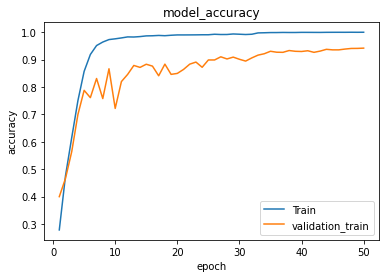

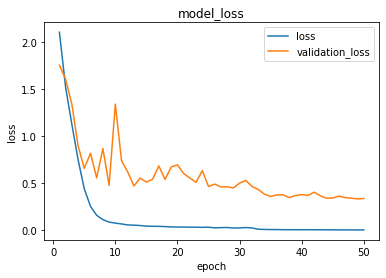

In [ ]:
# visualization 50 epoch
total_epoch = range(1,len(lstm_history.history['loss'])+1)


# compare f1-score metric and val_accuracy in every epoch
plt.plot(total_epoch,lstm_history.history['acc'])
plt.plot(total_epoch,lstm_history.history['val_acc'])
plt.title('model_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','validation_train'])
plt.show()

# compare loss and val_accuracy in every epoch
plt.plot(total_epoch,lstm_history.history['loss'])
plt.plot(total_epoch,lstm_history.history['val_loss'])
plt.title('model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss','validation_loss'])
plt.show()


In [ ]:
y_predicion = lstm_model.predict(X_test_scalar)
y_predicion = np.argmax(y_predicion, axis=1)
y_predicion

305/305 [==============================] - 50s 163ms/step


array([ 0,  5,  0, ...,  3, 12,  1])

In [ ]:
y_result = np.argmax(y_test, axis=1)
y_result

array([ 0,  5,  0, ...,  3, 12,  1])

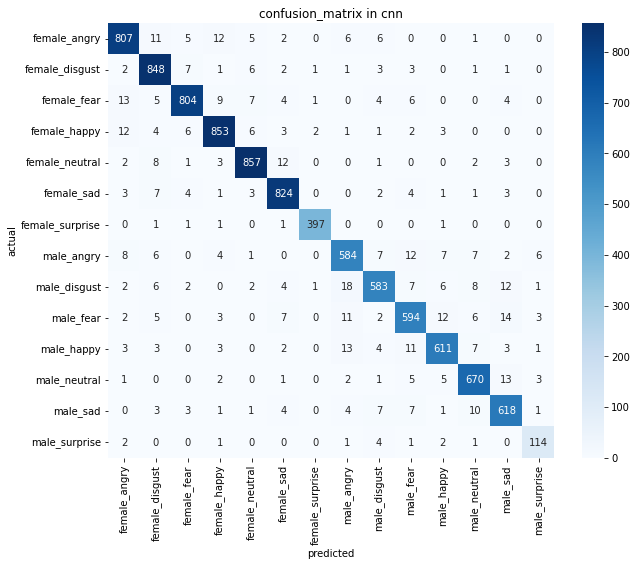

In [ ]:
list_emotion = ['female_angry',
 'female_disgust',
 'female_fear',
 'female_happy',
 'female_neutral',
 'female_sad',
 'female_surprise',
 'male_angry',
 'male_disgust',
 'male_fear',
 'male_happy',
 'male_neutral',
 'male_sad',
 'male_surprise'
]
matrix = confusion_matrix(y_true=y_result, y_pred=y_predicion)
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, xticklabels=list_emotion, yticklabels=list_emotion, cmap="Blues", annot=True, fmt="d")
plt.title("confusion_matrix in cnn")
plt.ylabel('actual')
plt.xlabel('predicted')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       855
           1       0.94      0.96      0.95       876
           2       0.97      0.94      0.95       857
           3       0.96      0.95      0.96       893
           4       0.97      0.96      0.96       889
           5       0.95      0.96      0.96       853
           6       0.99      0.99      0.99       402
           7       0.92      0.91      0.91       644
           8       0.94      0.89      0.92       652
           9       0.92      0.90      0.91       659
          10       0.94      0.92      0.93       661
          11       0.94      0.95      0.95       703
          12       0.92      0.93      0.93       660
          13       0.89      0.90      0.89       126

   micro avg       0.94      0.94      0.94      9730
   macro avg       0.94      0.94      0.94      9730
weighted avg       0.94      0.94      0.94      9730
 samples avg       0.94   

In [ ]:
# show accuracy in lstm 
print(f'accuracy_score:',accuracy_score(y_test, y_pred))

accuracy_score: 0.9400822199383351


## predict_data

## save model

In [ ]:
lstm_model.save("/content/drive/MyDrive/essex_university/dissertation/assignment_two/code_v3/gender_emotion/lstm_model.h5")
print("save completed")

save completed


In [ ]:
test_model = keras.models.load_model('/content/drive/MyDrive/essex_university/dissertation/assignment_two/code_v3/gender_emotion/lstm_model.h5',custom_objects={"f1_model": f1_model,"recall_model":recall_model,"precision_model":precision_model })
print("load_completed")


load_completed


In [ ]:
test = test_model.predict(X_test_scalar)
test = np.argmax(test, axis=1)
test

305/305 [==============================] - 51s 163ms/step


array([ 0,  5,  0, ...,  3, 12,  1])

# GRU

## Train model

In [ ]:
# The GRU architecture
gru_model = Sequential()
# First GRU layer with Dropout regularisation
gru_model.add(GRU(units=128, return_sequences=True, input_shape=(X_train.shape[1],1)))
gru_model.add(Dropout(0.2))
# Second GRU layer
gru_model.add(GRU(units=128, return_sequences=True))
gru_model.add(Dropout(0.2))
# Third GRU layer
gru_model.add(GRU(units=64, return_sequences=True))
gru_model.add(Dropout(0.2))
# Fourth GRU layer
gru_model.add(GRU(units=64, return_sequences=True))
gru_model.add(Dropout(0.2))

# Fifth GRU layer
gru_model.add(GRU(units=64, return_sequences=True))
gru_model.add(Dropout(0.2))

# The output layer
gru_model.add(layers.Flatten())
gru_model.add(layers.Dense(128, activation = 'relu'))
gru_model.add(layers.BatchNormalization())
gru_model.add(layers.Dense(14, activation = "softmax"))
# Compiling the RNN
gru_model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics = ["acc", f1_model, recall_model, precision_model])

# Fitting to the training set


In [ ]:
# Fitting to the training set
# lstm_model.fit(X_train_scalar,y_train,epochs=50,batch_size=64)

gru_history = gru_model.fit(X_train_scalar, y_train, 
                        validation_data=(X_test_scalar, y_test),
                        callbacks=[early_stop, lr_reduction],
                        epochs=50, batch_size=32)

Epoch 1/50
1217/1217 [==============================] - 453s 372ms/step - loss: 1.8608 - acc: 0.3632 - f1_model: 0.2471 - recall_model: 0.1580 - precision_model: 0.6748 - val_loss: 1.9480 - val_acc: 0.3966 - val_f1_model: 0.3636 - val_recall_model: 0.2735 - val_precision_model: 0.5536 - lr: 0.0010
Epoch 2/50
1217/1217 [==============================] - 451s 370ms/step - loss: 1.3595 - acc: 0.5288 - f1_model: 0.4641 - recall_model: 0.3367 - precision_model: 0.7682 - val_loss: 1.6727 - val_acc: 0.4618 - val_f1_model: 0.4423 - val_recall_model: 0.3540 - val_precision_model: 0.5975 - lr: 0.0010
Epoch 3/50
1217/1217 [==============================] - 450s 370ms/step - loss: 1.0573 - acc: 0.6348 - f1_model: 0.5999 - recall_model: 0.4842 - precision_model: 0.7973 - val_loss: 1.3686 - val_acc: 0.5619 - val_f1_model: 0.5489 - val_recall_model: 0.4583 - val_precision_model: 0.6916 - lr: 0.0010
Epoch 4/50
1217/1217 [==============================] - 450s 370ms/step - loss: 0.8280 - acc: 0.7137 - 

## Metric

In [ ]:
# Display loss, accuracy, f1-score, precision, recall metrics with evaluate function to see the model performance
score_metric = gru_model.evaluate(X_test_scalar, y_test)
print(score_metric)
print('test_loss:', score_metric[0])
print('test_accuracy:', score_metric[1])
print('test_f1:', score_metric[2])
print('test_precision:', score_metric[3])
print('test_recall:', score_metric[4])

305/305 [==============================] - 43s 141ms/step - loss: 0.4104 - acc: 0.9245 - f1_model: 0.9241 - recall_model: 0.9221 - precision_model: 0.9262
[0.41042307019233704, 0.9244604110717773, 0.9241306185722351, 0.9221311211585999, 0.9262107014656067]
test_loss: 0.41042307019233704
test_accuracy: 0.9244604110717773
test_f1: 0.9241306185722351
test_precision: 0.9221311211585999
test_recall: 0.9262107014656067


In [ ]:
gru_history.history

{'loss': [1.8607605695724487,
  1.3595448732376099,
  1.057289481163025,
  0.8279936909675598,
  0.6362878680229187,
  0.48832425475120544,
  0.3739153742790222,
  0.3059527575969696,
  0.2536073327064514,
  0.21249821782112122,
  0.18964453041553497,
  0.1618252843618393,
  0.1432952582836151,
  0.1382238268852234,
  0.0626903846859932,
  0.049684301018714905,
  0.04191367328166962,
  0.03879143297672272,
  0.03802629932761192,
  0.03415733575820923,
  0.03362427279353142,
  0.03153163939714432,
  0.02098032273352146,
  0.015097127296030521,
  0.011884244158864021,
  0.011219062842428684,
  0.011791783384978771,
  0.01104382611811161,
  0.010410419665277004,
  0.00898024532943964,
  0.009749113582074642,
  0.009438690729439259,
  0.008677595295011997,
  0.010047136805951595,
  0.008685322478413582,
  0.00825366098433733,
  0.008388922549784184,
  0.009318345226347446,
  0.005297629628330469,
  0.005615370348095894,
  0.004468880128115416,
  0.00426273001357913,
  0.0034271040931344032

In [ ]:
from sklearn.metrics import roc_auc_score
predition = gru_model.predict(X_test_scalar)
y_pred = np.round(predition)
print(y_pred)
auc = roc_auc_score(y_pred, y_test)
print("AUC: {:.2%}".format (auc))

305/305 [==============================] - 44s 139ms/step
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
AUC: 95.87%


## virtualization

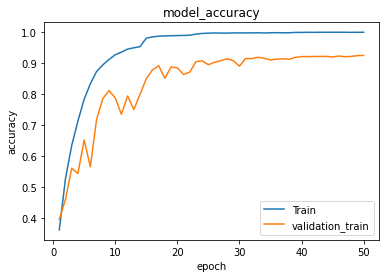

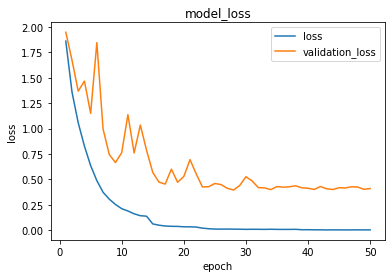

In [ ]:
# visualization 50 epoch
total_epoch = range(1,len(gru_history.history['loss'])+1)


# compare f1-score metric and val_accuracy in every epoch
plt.plot(total_epoch,gru_history.history['acc'])
plt.plot(total_epoch,gru_history.history['val_acc'])
plt.title('model_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','validation_train'])
plt.show()

# compare loss and val_accuracy in every epoch
plt.plot(total_epoch,gru_history.history['loss'])
plt.plot(total_epoch,gru_history.history['val_loss'])
plt.title('model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss','validation_loss'])
plt.show()


In [ ]:
y_predicion = gru_model.predict(X_test_scalar)
y_predicion = np.argmax(y_predicion, axis=1)
y_predicion

305/305 [==============================] - 43s 141ms/step


array([ 0,  5,  0, ...,  3, 11,  1])

In [ ]:
y_result = np.argmax(y_test, axis=1)
y_result

array([ 0,  5,  0, ...,  3, 12,  1])

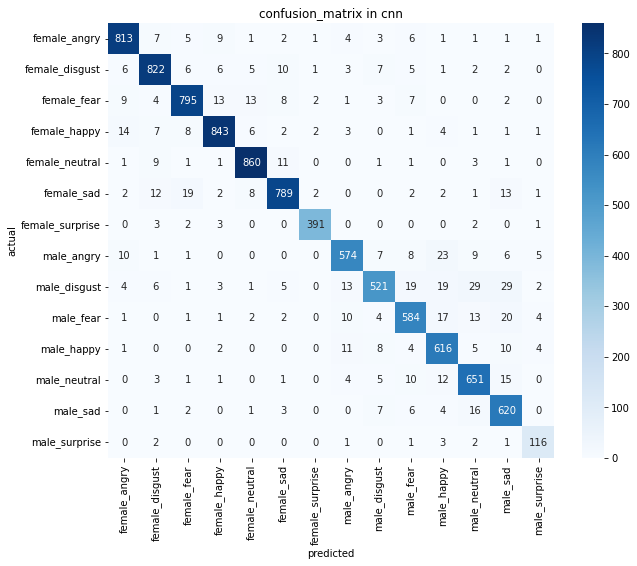

In [ ]:
list_emotion = ['female_angry',
 'female_disgust',
 'female_fear',
 'female_happy',
 'female_neutral',
 'female_sad',
 'female_surprise',
 'male_angry',
 'male_disgust',
 'male_fear',
 'male_happy',
 'male_neutral',
 'male_sad',
 'male_surprise'
]
matrix = confusion_matrix(y_true=y_result, y_pred=y_predicion)
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, xticklabels=list_emotion, yticklabels=list_emotion, cmap="Blues", annot=True, fmt="d")
plt.title("confusion_matrix in cnn")
plt.ylabel('actual')
plt.xlabel('predicted')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       855
           1       0.94      0.94      0.94       876
           2       0.95      0.93      0.94       857
           3       0.96      0.94      0.95       893
           4       0.96      0.97      0.96       889
           5       0.95      0.92      0.94       853
           6       0.98      0.97      0.98       402
           7       0.93      0.89      0.91       644
           8       0.92      0.80      0.86       652
           9       0.90      0.88      0.89       659
          10       0.88      0.93      0.91       661
          11       0.89      0.93      0.91       703
          12       0.86      0.94      0.90       660
          13       0.87      0.92      0.89       126

   micro avg       0.93      0.92      0.93      9730
   macro avg       0.92      0.92      0.92      9730
weighted avg       0.93      0.92      0.93      9730
 samples avg       0.92   

In [ ]:
# show accuracy in lstm 
print(f'accuracy_score:',accuracy_score(y_test, y_pred))

accuracy_score: 0.9234326824254881


## predict_data

## save model

In [ ]:
gru_model.save("/content/drive/MyDrive/essex_university/dissertation/assignment_two/code_v3/gender_emotion/gru_model.h5")
print("save completed")

save completed


In [ ]:
test_model = keras.models.load_model('/content/drive/MyDrive/essex_university/dissertation/assignment_two/code_v3/gender_emotion/gru_model.h5',custom_objects={"f1_model": f1_model,"recall_model":recall_model,"precision_model":precision_model })
print("load_completed")


load_completed


In [ ]:
test = test_model.predict(X_test_scalar)
test = np.argmax(test, axis=1)
test

305/305 [==============================] - 44s 140ms/step


array([ 0,  5,  0, ...,  3, 11,  1])

# RNN[ASK PROFESSOR]

## Train model

In [ ]:
# Initialising the RNN
recurrent_neural_network_model = Sequential()

# Adding the first RNN layer and some Dropout regularisation
recurrent_neural_network_model.add(SimpleRNN(units = 128, return_sequences = True, input_shape = (X_train_scalar.shape[1], 1)))
recurrent_neural_network_model.add(Dropout(0.2))

# Adding a second RNN layer and some Dropout regularisation
recurrent_neural_network_model.add(SimpleRNN(units = 128, return_sequences = True))
recurrent_neural_network_model.add(Dropout(0.2))

# Adding a third RNN layer and some Dropout regularisation
recurrent_neural_network_model.add(SimpleRNN(units = 64, return_sequences = True))
recurrent_neural_network_model.add(Dropout(0.2))

# Adding a third RNN layer and some Dropout regularisation
recurrent_neural_network_model.add(SimpleRNN(units = 64, return_sequences = True))
recurrent_neural_network_model.add(Dropout(0.2))

# Adding a fifth RNN layer and some Dropout regularisation
recurrent_neural_network_model.add(SimpleRNN(units = 64))
recurrent_neural_network_model.add(Dropout(0.2))

# Adding the output layer
recurrent_neural_network_model.add(Dense(units = 14))

# Compiling the RNN
recurrent_neural_network_model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy',metrics = ["acc", f1_model, recall_model, precision_model])

recurrent_neural_network_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_31 (SimpleRNN)   (None, 2376, 50)          2600      
                                                                 
 dropout_41 (Dropout)        (None, 2376, 50)          0         
                                                                 
 simple_rnn_32 (SimpleRNN)   (None, 2376, 50)          5050      
                                                                 
 dropout_42 (Dropout)        (None, 2376, 50)          0         
                                                                 
 simple_rnn_33 (SimpleRNN)   (None, 2376, 50)          5050      
                                                                 
 dropout_43 (Dropout)        (None, 2376, 50)          0         
                                                                 
 simple_rnn_34 (SimpleRNN)   (None, 50)               

In [ ]:
# Fitting to the training set
# lstm_model.fit(X_train_scalar,y_train,epochs=50,batch_size=64)

recurrent_neural_network_history = recurrent_neural_network_model.fit(X_train_scalar, y_train, 
                        validation_data=(X_test_scalar, y_test),
                        callbacks=[early_stop, lr_reduction],
                        epochs=3, batch_size=32)

Epoch 1/3
   2/1095 [..............................] - ETA: 2:10:28 - loss: 0.7281 - accuracy: 0.1562 - f1_model: 0.2322 - recall_model: 0.3125 - precision_model: 0.1859

KeyboardInterrupt: ignored

# DNN

## Train model

In [ ]:
# Initialising the DNN
dnn_model = Sequential()

# Adding the input layer and the first hidden layer
dnn_model.add(Dense(units=512,activation="relu", input_shape = (X_train_scalar.shape[1], 1)))
# Adding dropout to prevent overfitting
dnn_model.add(Dropout(0.2))

dnn_model.add(Dense(units=512,activation="relu"))
dnn_model.add(Dropout(0.2))

dnn_model.add(Dense(units=256,activation="relu"))
dnn_model.add(Dropout(0.2))

dnn_model.add(Dense(units=256,activation="relu"))
dnn_model.add(Dropout(0.2))

dnn_model.add(Dense(units=128,activation="relu"))
dnn_model.add(Dropout(0.2))

# Adding the output layer
dnn_model.add(layers.Flatten())
dnn_model.add(layers.Dense(512, activation = 'relu'))
dnn_model.add(layers.BatchNormalization())
dnn_model.add(Dense(units=14,activation="softmax"))

# Compiling the DNN
# classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
dnn_model.compile(optimizer = "rmsprop", loss = "categorical_crossentropy", metrics = ["acc", f1_model, recall_model, precision_model])
dnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2376, 512)         1024      
                                                                 
 dropout_5 (Dropout)         (None, 2376, 512)         0         
                                                                 
 dense_3 (Dense)             (None, 2376, 512)         262656    
                                                                 
 dropout_6 (Dropout)         (None, 2376, 512)         0         
                                                                 
 dense_4 (Dense)             (None, 2376, 256)         131328    
                                                                 
 dropout_7 (Dropout)         (None, 2376, 256)         0         
                                                                 
 dense_5 (Dense)             (None, 2376, 256)        

In [ ]:
# Fitting to the training set
# lstm_model.fit(X_train_scalar,y_train,epochs=50,batch_size=64)

dnn_history = dnn_model.fit(X_train_scalar, y_train, 
                        validation_data=(X_test_scalar, y_test),
                        callbacks=[early_stop, lr_reduction],
                        epochs=50, batch_size=32)

Epoch 1/50
1217/1217 [==============================] - 210s 171ms/step - loss: 2.0178 - acc: 0.3326 - f1_model: 0.2082 - recall_model: 0.1295 - precision_model: 0.6030 - val_loss: 2.1573 - val_acc: 0.3304 - val_f1_model: 0.2377 - val_recall_model: 0.1548 - val_precision_model: 0.5413 - lr: 0.0010
Epoch 2/50
1217/1217 [==============================] - 205s 169ms/step - loss: 1.5412 - acc: 0.4860 - f1_model: 0.4092 - recall_model: 0.2839 - precision_model: 0.7590 - val_loss: 1.9457 - val_acc: 0.3863 - val_f1_model: 0.3749 - val_recall_model: 0.2929 - val_precision_model: 0.5294 - lr: 0.0010
Epoch 3/50
1217/1217 [==============================] - 205s 168ms/step - loss: 1.2595 - acc: 0.5821 - f1_model: 0.5413 - recall_model: 0.4162 - precision_model: 0.7867 - val_loss: 1.9463 - val_acc: 0.4354 - val_f1_model: 0.4193 - val_recall_model: 0.3421 - val_precision_model: 0.5482 - lr: 0.0010
Epoch 4/50
1217/1217 [==============================] - 205s 168ms/step - loss: 1.0096 - acc: 0.6663 - 

## Metric

In [ ]:
# Display loss, accuracy, f1-score, precision, recall metrics with evaluate function to see the model performance
score_metric = dnn_model.evaluate(X_test_scalar, y_test)
print(score_metric)
print('test_loss:', score_metric[0])
print('test_accuracy:', score_metric[1])
print('test_f1:', score_metric[2])
print('test_precision:', score_metric[3])
print('test_recall:', score_metric[4])

305/305 [==============================] - 10s 33ms/step - loss: 1.8106 - acc: 0.7226 - f1_model: 0.7244 - recall_model: 0.7153 - precision_model: 0.7341
[1.8106014728546143, 0.7226104736328125, 0.7243990302085876, 0.7152664065361023, 0.7340962886810303]
test_loss: 1.8106014728546143
test_accuracy: 0.7226104736328125
test_f1: 0.7243990302085876
test_precision: 0.7152664065361023
test_recall: 0.7340962886810303


In [ ]:
dnn_history.history

{'loss': [2.017770528793335,
  1.5412429571151733,
  1.2595261335372925,
  1.0096195936203003,
  0.8055039644241333,
  0.6463125944137573,
  0.5253642201423645,
  0.4199013113975525,
  0.34762856364250183,
  0.28631478548049927,
  0.2474460005760193,
  0.20936965942382812,
  0.19046108424663544,
  0.16398265957832336,
  0.15639497339725494,
  0.14728517830371857,
  0.13282881677150726,
  0.06898391991853714,
  0.052327681332826614,
  0.04679502546787262,
  0.04293987900018692,
  0.039535246789455414,
  0.039206571877002716,
  0.023305531591176987,
  0.02101714350283146,
  0.020842140540480614,
  0.020449841395020485,
  0.01934056170284748,
  0.01736684888601303,
  0.01716313511133194,
  0.014936349354684353,
  0.011259740218520164,
  0.011557348072528839,
  0.011258726008236408,
  0.008888864889740944,
  0.009680087678134441,
  0.009571773931384087,
  0.007739425171166658,
  0.008298441767692566],
 'acc': [0.3326481282711029,
  0.4860475957393646,
  0.5820956826210022,
  0.666349768638

In [ ]:
from sklearn.metrics import roc_auc_score
predition = dnn_model.predict(X_test_scalar)
y_pred = np.round(predition)
print(y_pred)
auc = roc_auc_score(y_pred, y_test)
print("AUC: {:.2%}".format (auc))

305/305 [==============================] - 10s 32ms/step
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
AUC: 85.85%


## virtualization

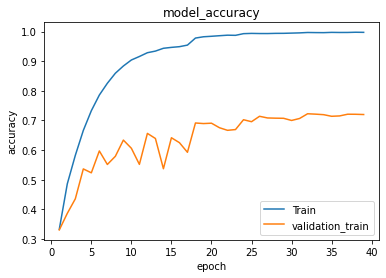

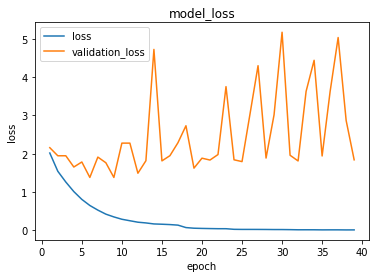

In [ ]:
# visualization 50 epoch
total_epoch = range(1,len(dnn_history.history['loss'])+1)


# compare f1-score metric and val_accuracy in every epoch
plt.plot(total_epoch,dnn_history.history['acc'])
plt.plot(total_epoch,dnn_history.history['val_acc'])
plt.title('model_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','validation_train'])
plt.show()

# compare loss and val_accuracy in every epoch
plt.plot(total_epoch,dnn_history.history['loss'])
plt.plot(total_epoch,dnn_history.history['val_loss'])
plt.title('model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss','validation_loss'])
plt.show()


In [ ]:
y_predicion = dnn_model.predict(X_test_scalar)
y_predicion = np.argmax(y_predicion, axis=1)
y_predicion

305/305 [==============================] - 10s 32ms/step


array([ 0,  5,  0, ...,  3, 11,  1])

In [ ]:
y_result = np.argmax(y_test, axis=1)
y_result

array([ 0,  5,  0, ...,  3, 12,  1])

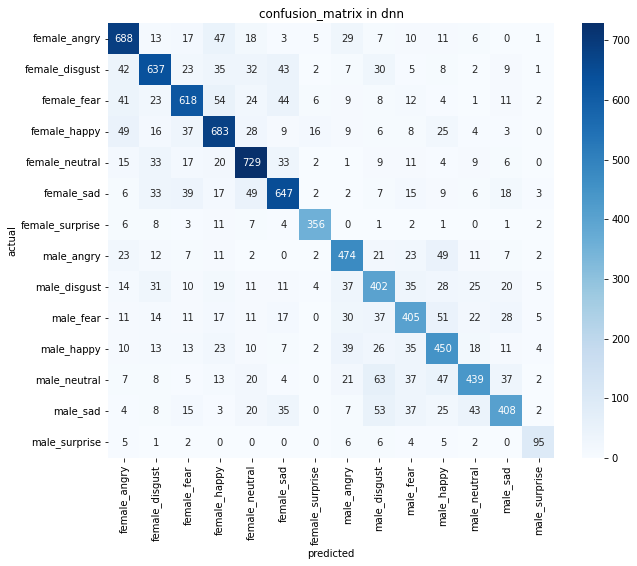

In [ ]:
list_emotion = ['female_angry',
 'female_disgust',
 'female_fear',
 'female_happy',
 'female_neutral',
 'female_sad',
 'female_surprise',
 'male_angry',
 'male_disgust',
 'male_fear',
 'male_happy',
 'male_neutral',
 'male_sad',
 'male_surprise'
]
matrix = confusion_matrix(y_true=y_result, y_pred=y_predicion)
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, xticklabels=list_emotion, yticklabels=list_emotion, cmap="Blues", annot=True, fmt="d")
plt.title("confusion_matrix in dnn")
plt.ylabel('actual')
plt.xlabel('predicted')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       855
           1       0.76      0.72      0.74       876
           2       0.77      0.72      0.74       857
           3       0.73      0.76      0.74       893
           4       0.77      0.82      0.79       889
           5       0.77      0.75      0.76       853
           6       0.90      0.89      0.89       402
           7       0.72      0.73      0.73       644
           8       0.60      0.60      0.60       652
           9       0.65      0.61      0.63       659
          10       0.64      0.67      0.66       661
          11       0.75      0.61      0.68       703
          12       0.74      0.61      0.67       660
          13       0.77      0.75      0.76       126

   micro avg       0.73      0.72      0.73      9730
   macro avg       0.74      0.72      0.73      9730
weighted avg       0.74      0.72      0.72      9730
 samples avg       0.72   

In [ ]:
# show accuracy in lstm 
print(f'accuracy_score:',accuracy_score(y_test, y_pred))

accuracy_score: 0.7159301130524152


## predict_data

## save model

In [ ]:
dnn_model.save("/content/drive/MyDrive/essex_university/dissertation/assignment_two/code_v3/gender_emotion/dnn.h5")
print("save completed")

save completed


In [ ]:
test_model = keras.models.load_model('/content/drive/MyDrive/essex_university/dissertation/assignment_two/code_v3/gender_emotion/dnn.h5',custom_objects={"f1_model": f1_model,"recall_model":recall_model,"precision_model":precision_model })
print("load_completed")


load_completed


In [ ]:
test = test_model.predict(X_test_scalar)
test = np.argmax(test, axis=1)
test

305/305 [==============================] - 10s 32ms/step


array([ 0,  5,  0, ...,  3, 11,  1])

# ANN

## Train model

In [ ]:
# Initialising the ANN
ann_model = Sequential()

# Adding the input layer and the first hidden layer
ann_model.add(Dense(units=256,activation="relu", input_shape = (X_train_scalar.shape[1], 1)))
# Adding dropout to prevent overfitting
ann_model.add(Dropout(0.2))

ann_model.add(Dense(units=256,activation="relu"))
ann_model.add(Dropout(0.2))

ann_model.add(Dense(units=128,activation="relu"))
ann_model.add(Dropout(0.2))

# Adding the output layer
ann_model.add(layers.Flatten())
ann_model.add(layers.Dense(256, activation = 'relu'))
ann_model.add(layers.BatchNormalization())
ann_model.add(Dense(units=14,activation="softmax"))

# Compiling the DNN
# classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann_model.compile(optimizer = "rmsprop", loss = "categorical_crossentropy", metrics = ["acc", f1_model, recall_model, precision_model])
ann_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 2376, 256)         512       
                                                                 
 dropout_10 (Dropout)        (None, 2376, 256)         0         
                                                                 
 dense_10 (Dense)            (None, 2376, 256)         65792     
                                                                 
 dropout_11 (Dropout)        (None, 2376, 256)         0         
                                                                 
 dense_11 (Dense)            (None, 2376, 128)         32896     
                                                                 
 dropout_12 (Dropout)        (None, 2376, 128)         0         
                                                                 
 flatten_2 (Flatten)         (None, 304128)           

In [ ]:
# Fitting to the training set
# lstm_model.fit(X_train_scalar,y_train,epochs=50,batch_size=64)

ann_history = ann_model.fit(X_train_scalar, y_train, 
                        validation_data=(X_test_scalar, y_test),
                        callbacks=[early_stop, lr_reduction],
                        epochs=50, batch_size=32)

Epoch 1/50
1217/1217 [==============================] - 85s 69ms/step - loss: 1.9542 - acc: 0.3464 - f1_model: 0.2202 - recall_model: 0.1376 - precision_model: 0.6278 - val_loss: 1.9697 - val_acc: 0.3733 - val_f1_model: 0.2876 - val_recall_model: 0.1942 - val_precision_model: 0.5784 - lr: 0.0010
Epoch 2/50
1217/1217 [==============================] - 83s 68ms/step - loss: 1.4635 - acc: 0.5117 - f1_model: 0.4448 - recall_model: 0.3150 - precision_model: 0.7812 - val_loss: 1.7586 - val_acc: 0.4316 - val_f1_model: 0.4049 - val_recall_model: 0.2978 - val_precision_model: 0.6492 - lr: 0.0010
Epoch 3/50
1217/1217 [==============================] - 82s 68ms/step - loss: 1.1705 - acc: 0.6134 - f1_model: 0.5756 - recall_model: 0.4490 - precision_model: 0.8149 - val_loss: 1.5766 - val_acc: 0.4906 - val_f1_model: 0.4717 - val_recall_model: 0.3733 - val_precision_model: 0.6503 - lr: 0.0010
Epoch 4/50
1217/1217 [==============================] - 82s 68ms/step - loss: 0.9377 - acc: 0.6875 - f1_model

## Metric

In [ ]:
# Display loss, accuracy, f1-score, precision, recall metrics with evaluate function to see the model performance
score_metric = ann_model.evaluate(X_test_scalar, y_test)
print(score_metric)
print('test_loss:', score_metric[0])
print('test_accuracy:', score_metric[1])
print('test_f1:', score_metric[2])
print('test_precision:', score_metric[3])
print('test_recall:', score_metric[4])

305/305 [==============================] - 4s 12ms/step - loss: 1.6205 - acc: 0.7413 - f1_model: 0.7430 - recall_model: 0.7343 - precision_model: 0.7522
[1.6204652786254883, 0.7413155436515808, 0.743026614189148, 0.7343237996101379, 0.752198338508606]
test_loss: 1.6204652786254883
test_accuracy: 0.7413155436515808
test_f1: 0.743026614189148
test_precision: 0.7343237996101379
test_recall: 0.752198338508606


In [ ]:
ann_history.history

{'loss': [1.9542491436004639,
  1.4635159969329834,
  1.1705126762390137,
  0.93769770860672,
  0.7435680627822876,
  0.592561662197113,
  0.4716914892196655,
  0.39046725630760193,
  0.3236076831817627,
  0.2775065302848816,
  0.22890973091125488,
  0.19818457961082458,
  0.17789873480796814,
  0.15745843946933746,
  0.07899613678455353,
  0.05580320954322815,
  0.05506874620914459,
  0.04865243285894394,
  0.045762598514556885,
  0.0440167598426342,
  0.04137304797768593,
  0.026946578174829483,
  0.021756991744041443,
  0.021050821989774704,
  0.017967451363801956,
  0.01685132458806038,
  0.015774184837937355,
  0.016024963930249214,
  0.016499752178788185,
  0.01101614162325859,
  0.010762931779026985,
  0.010086119174957275,
  0.008176974952220917,
  0.009958012029528618,
  0.009187181480228901,
  0.007814694195985794,
  0.00880650244653225,
  0.006292656995356083,
  0.0060907043516635895,
  0.005774590652436018,
  0.0061627160757780075,
  0.005625676829367876,
  0.00545302778482

In [ ]:
from sklearn.metrics import roc_auc_score
predition = ann_model.predict(X_test_scalar)
y_pred = np.round(predition)
print(y_pred)
auc = roc_auc_score(y_pred, y_test)
print("AUC: {:.2%}".format (auc))

305/305 [==============================] - 3s 10ms/step
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
AUC: 87.00%


## virtualization

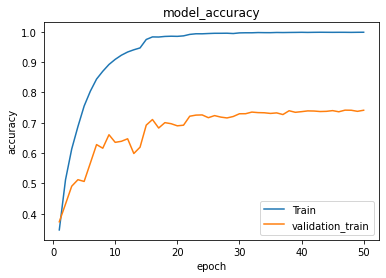

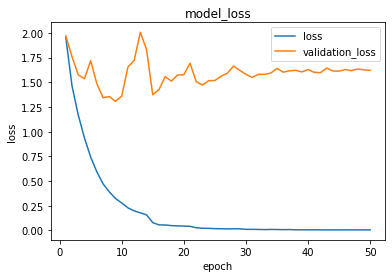

In [ ]:
# visualization 50 epoch
total_epoch = range(1,len(ann_history.history['loss'])+1)


# compare f1-score metric and val_accuracy in every epoch
plt.plot(total_epoch,ann_history.history['acc'])
plt.plot(total_epoch,ann_history.history['val_acc'])
plt.title('model_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','validation_train'])
plt.show()

# compare loss and val_accuracy in every epoch
plt.plot(total_epoch,ann_history.history['loss'])
plt.plot(total_epoch,ann_history.history['val_loss'])
plt.title('model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss','validation_loss'])
plt.show()


In [ ]:
y_predicion = ann_model.predict(X_test_scalar)
y_predicion = np.argmax(y_predicion, axis=1)
y_predicion

305/305 [==============================] - 3s 10ms/step


array([ 0,  5,  0, ...,  3, 11,  1])

In [ ]:
y_result = np.argmax(y_test, axis=1)
y_result

array([ 0,  5,  0, ...,  3, 12,  1])

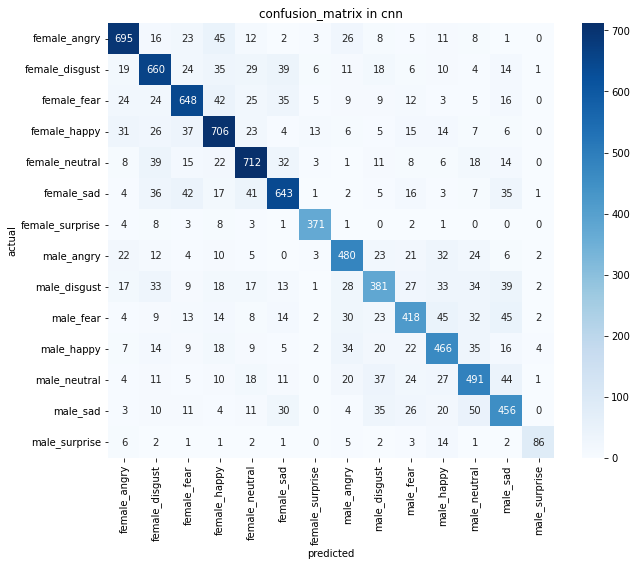

In [ ]:
list_emotion = ['female_angry',
 'female_disgust',
 'female_fear',
 'female_happy',
 'female_neutral',
 'female_sad',
 'female_surprise',
 'male_angry',
 'male_disgust',
 'male_fear',
 'male_happy',
 'male_neutral',
 'male_sad',
 'male_surprise'
]

matrix = confusion_matrix(y_true=y_result, y_pred=y_predicion)
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, xticklabels=list_emotion, yticklabels=list_emotion, cmap="Blues", annot=True, fmt="d")
plt.title("confusion_matrix in cnn")
plt.ylabel('actual')
plt.xlabel('predicted')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       855
           1       0.75      0.75      0.75       876
           2       0.78      0.75      0.76       857
           3       0.75      0.78      0.77       893
           4       0.79      0.79      0.79       889
           5       0.79      0.75      0.77       853
           6       0.91      0.92      0.91       402
           7       0.74      0.74      0.74       644
           8       0.68      0.58      0.62       652
           9       0.70      0.62      0.66       659
          10       0.70      0.69      0.69       661
          11       0.71      0.69      0.70       703
          12       0.67      0.68      0.67       660
          13       0.87      0.66      0.75       126

   micro avg       0.75      0.74      0.74      9730
   macro avg       0.76      0.73      0.74      9730
weighted avg       0.75      0.74      0.74      9730
 samples avg       0.74   

In [ ]:
# show accuracy in ann 
print(f'accuracy_score:',accuracy_score(y_test, y_pred))

accuracy_score: 0.7350462487153134


## predict_data

## save model

In [ ]:
ann_model.save("/content/drive/MyDrive/essex_university/dissertation/assignment_two/code_v3/gender_emotion/ann_model.h5")
print("save completed")

save completed


In [ ]:
test_model = keras.models.load_model('/content/drive/MyDrive/essex_university/dissertation/assignment_two/code_v3/gender_emotion/ann_model.h5',custom_objects={"f1_model": f1_model,"recall_model":recall_model,"precision_model":precision_model })
print("load_completed")


load_completed


In [ ]:
test = test_model.predict(X_test_scalar)
test = np.argmax(test, axis=1)
test

305/305 [==============================] - 3s 10ms/step


array([ 0,  5,  0, ...,  3, 11,  1])

# CNN_LSTM

## Train model

In [ ]:
cnn_lstm_model = models.Sequential()

cnn_lstm_model.add(layers.Conv1D(512, strides = 1, kernel_size = 5, padding = "same", activation = "relu", input_shape = (X_train_scalar.shape[1], 1)))
cnn_lstm_model.add(layers.BatchNormalization())
cnn_lstm_model.add(layers.MaxPool1D(strides = 2, pool_size = 5, padding = "same"))

cnn_lstm_model.add(layers.Conv1D(512, strides = 1, kernel_size = 5, padding = "same", activation = "relu"))
cnn_lstm_model.add(layers.BatchNormalization())
cnn_lstm_model.add(layers.MaxPool1D(strides = 2, pool_size = 5, padding = "same"))

cnn_lstm_model.add(layers.Conv1D(256, strides = 1, kernel_size = 5, padding = "same", activation = "relu"))
cnn_lstm_model.add(layers.BatchNormalization())
cnn_lstm_model.add(layers.MaxPool1D(strides = 2, pool_size = 5, padding = "same"))

cnn_lstm_model.add(layers.Conv1D(256, strides = 1, kernel_size = 3, padding = 'same', activation = 'relu'))
cnn_lstm_model.add(layers.BatchNormalization())
cnn_lstm_model.add(layers.MaxPooling1D(strides = 2, pool_size = 5, padding = 'same'))

cnn_lstm_model.add(layers.Conv1D(128, strides = 1, kernel_size = 3, padding = 'same', activation = 'relu'))
cnn_lstm_model.add(layers.BatchNormalization())
cnn_lstm_model.add(layers.MaxPooling1D(strides = 2, pool_size = 3, padding = 'same'))

# First layer
cnn_lstm_model.add(LSTM(units=128, return_sequences=True))
cnn_lstm_model.add(Dropout(0.2))
# Second layer
cnn_lstm_model.add(LSTM(units=128, return_sequences=True))
cnn_lstm_model.add(Dropout(0.2))
# Third layer
cnn_lstm_model.add(LSTM(units=64, return_sequences=True))
cnn_lstm_model.add(Dropout(0.2))
# Fourth layer
cnn_lstm_model.add(LSTM(units=64, return_sequences=True))
cnn_lstm_model.add(Dropout(0.2))

# # fifth layer
cnn_lstm_model.add(LSTM(units=64, return_sequences=True))
cnn_lstm_model.add(Dropout(0.2))

cnn_lstm_model.add(layers.Flatten())
cnn_lstm_model.add(layers.Dense(512, activation = 'relu'))
cnn_lstm_model.add(layers.BatchNormalization())
cnn_lstm_model.add(layers.Dense(14, activation = "softmax"))

cnn_lstm_model.compile(optimizer = "rmsprop", loss = "categorical_crossentropy", metrics = ["acc", f1_model, recall_model, precision_model])
cnn_lstm_model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2376, 512)         3072      
                                                                 
 batch_normalization_3 (Batc  (None, 2376, 512)        2048      
 hNormalization)                                                 
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1188, 512)        0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 1188, 512)         1311232   
                                                                 
 batch_normalization_4 (Batc  (None, 1188, 512)        2048      
 hNormalization)                                                 
                                                      

In [ ]:
cnn_lstm_history = cnn_lstm_model.fit(X_train_scalar, y_train, 
                        validation_data=(X_test_scalar, y_test),
                        callbacks=[early_stop, lr_reduction],
                        epochs=50, batch_size=32)

Epoch 1/50
1217/1217 [==============================] - 246s 190ms/step - loss: 2.0931 - acc: 0.2835 - f1_model: 0.1813 - recall_model: 0.1171 - precision_model: 0.4724 - val_loss: 2.9872 - val_acc: 0.2210 - val_f1_model: 0.1869 - val_recall_model: 0.1484 - val_precision_model: 0.2555 - lr: 0.0010
Epoch 2/50
1217/1217 [==============================] - 227s 187ms/step - loss: 1.5510 - acc: 0.4470 - f1_model: 0.3835 - recall_model: 0.2708 - precision_model: 0.6798 - val_loss: 1.7527 - val_acc: 0.4047 - val_f1_model: 0.3671 - val_recall_model: 0.2759 - val_precision_model: 0.5617 - lr: 0.0010
Epoch 3/50
1217/1217 [==============================] - 228s 187ms/step - loss: 1.3684 - acc: 0.5054 - f1_model: 0.4508 - recall_model: 0.3337 - precision_model: 0.7112 - val_loss: 1.4075 - val_acc: 0.5066 - val_f1_model: 0.4527 - val_recall_model: 0.3422 - val_precision_model: 0.6823 - lr: 0.0010
Epoch 4/50
1217/1217 [==============================] - 227s 187ms/step - loss: 1.2688 - acc: 0.5396 - 

## Metric

In [ ]:
# Display loss, accuracy, f1-score, precision, recall metrics with evaluate function to see the model performance
score_metric = cnn_lstm_model.evaluate(X_test_scalar, y_test)
print(score_metric)
print('test_loss:', score_metric[0])
print('test_accuracy:', score_metric[1])
print('test_f1:', score_metric[2])
print('test_precision:', score_metric[3])
print('test_recall:', score_metric[4])

305/305 [==============================] - 16s 53ms/step - loss: 0.2919 - acc: 0.9402 - f1_model: 0.9407 - recall_model: 0.9389 - precision_model: 0.9426
[0.29194533824920654, 0.940185010433197, 0.9407245516777039, 0.9389344453811646, 0.942579448223114]
test_loss: 0.29194533824920654
test_accuracy: 0.940185010433197
test_f1: 0.9407245516777039
test_precision: 0.9389344453811646
test_recall: 0.942579448223114


In [ ]:
cnn_lstm_history.history

{'loss': [2.0930798053741455,
  1.5509508848190308,
  1.3683693408966064,
  1.2688097953796387,
  1.1759567260742188,
  1.1068804264068604,
  1.04206383228302,
  0.9780115485191345,
  0.9136248826980591,
  0.8569402098655701,
  0.8018933534622192,
  0.7426461577415466,
  0.6866296529769897,
  0.6387510299682617,
  0.5887258052825928,
  0.5429233908653259,
  0.5047140717506409,
  0.4741857647895813,
  0.4357508718967438,
  0.4038948118686676,
  0.37796899676322937,
  0.3560433089733124,
  0.3282216787338257,
  0.19700492918491364,
  0.15743382275104523,
  0.1376427412033081,
  0.12425948679447174,
  0.11482886224985123,
  0.11093997955322266,
  0.1085222065448761,
  0.09633494913578033,
  0.09624823182821274,
  0.09076285362243652,
  0.08960934728384018,
  0.08406930416822433,
  0.08362267166376114,
  0.08106839656829834,
  0.07694347202777863,
  0.0716361552476883,
  0.04488319531083107,
  0.03459825739264488,
  0.030300704762339592,
  0.030767882242798805,
  0.02978532947599888,
  0.0

In [ ]:
from sklearn.metrics import roc_auc_score
predition = cnn_lstm_model.predict(X_test_scalar)
y_pred = np.round(predition)
# print(y_pred)

try:
    auc = roc_auc_score(y_pred, y_test)
    print("AUC: {:.2%}".format (auc))
except ValueError:
    pass

305/305 [==============================] - 17s 51ms/step
AUC: 96.67%


## virtualization

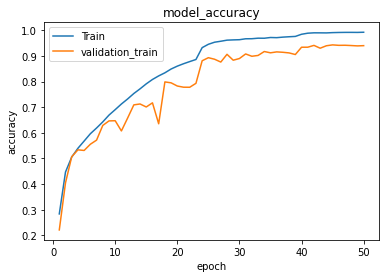

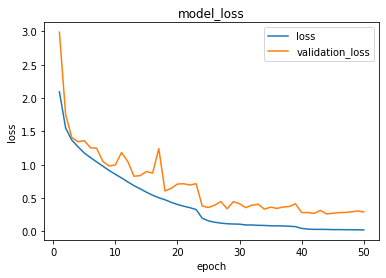

In [ ]:
# visualization 50 epoch
total_epoch = range(1,len(cnn_lstm_history.history['loss'])+1)


# compare f1-score metric and val_accuracy in every epoch
plt.plot(total_epoch,cnn_lstm_history.history['acc'])
plt.plot(total_epoch,cnn_lstm_history.history['val_acc'])
plt.title('model_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','validation_train'])
plt.show()

# compare loss and val_accuracy in every epoch
plt.plot(total_epoch,cnn_lstm_history.history['loss'])
plt.plot(total_epoch,cnn_lstm_history.history['val_loss'])
plt.title('model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss','validation_loss'])
plt.show()


In [ ]:
y_predicion = cnn_lstm_model.predict(X_test_scalar)
y_predicion = np.argmax(y_predicion, axis=1)
y_predicion

305/305 [==============================] - 16s 52ms/step


array([ 0,  5,  0, ...,  3, 12,  1])

In [ ]:
y_result = np.argmax(y_test, axis=1)
y_result

array([ 0,  5,  0, ...,  3, 12,  1])

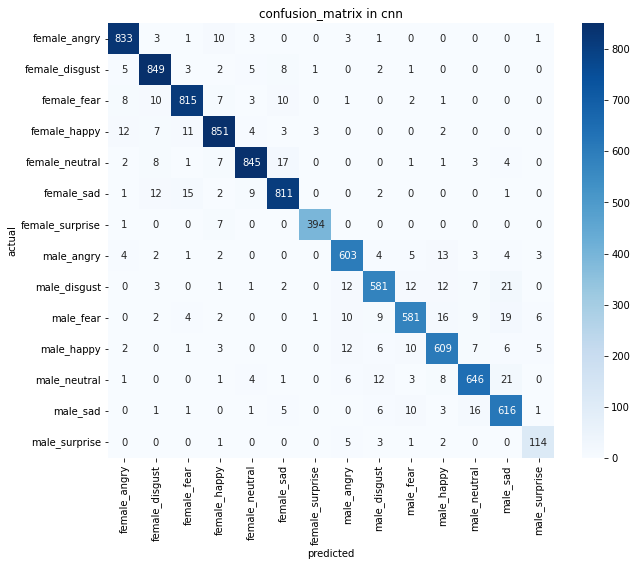

In [ ]:
list_emotion = ['female_angry',
 'female_disgust',
 'female_fear',
 'female_happy',
 'female_neutral',
 'female_sad',
 'female_surprise',
 'male_angry',
 'male_disgust',
 'male_fear',
 'male_happy',
 'male_neutral',
 'male_sad',
 'male_surprise'
]

matrix = confusion_matrix(y_true=y_result, y_pred=y_predicion)
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, xticklabels=list_emotion, yticklabels=list_emotion, cmap="Blues", annot=True, fmt="d")
plt.title("confusion_matrix in cnn")
plt.ylabel('actual')
plt.xlabel('predicted')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       855
           1       0.95      0.97      0.96       876
           2       0.96      0.95      0.95       857
           3       0.95      0.95      0.95       893
           4       0.97      0.95      0.96       889
           5       0.95      0.95      0.95       853
           6       0.99      0.98      0.98       402
           7       0.93      0.94      0.93       644
           8       0.93      0.89      0.91       652
           9       0.93      0.88      0.90       659
          10       0.92      0.92      0.92       661
          11       0.94      0.91      0.93       703
          12       0.90      0.93      0.91       660
          13       0.88      0.90      0.89       126

   micro avg       0.94      0.94      0.94      9730
   macro avg       0.94      0.94      0.94      9730
weighted avg       0.94      0.94      0.94      9730
 samples avg       0.94   

In [ ]:
# show accuracy in ann 
print(f'accuracy_score:',accuracy_score(y_test, y_pred))

accuracy_score: 0.9387461459403905


In [ ]:
cnn_lstm_model.save("/content/drive/MyDrive/essex_university/dissertation/assignment_two/code_v3/gender_emotion/cnn_lstm_model.h5")
print("save completed")

save completed


In [ ]:
cnn_lstm_model = keras.models.load_model('/content/drive/MyDrive/essex_university/dissertation/assignment_two/code_v3/gender_emotion/cnn_lstm_model.h5',custom_objects={"f1_model": f1_model,"recall_model":recall_model,"precision_model":precision_model })
print("load_completed")


load_completed


In [ ]:
test = cnn_lstm_model.predict(X_test_scalar)
test = np.argmax(test, axis=1)
test

305/305 [==============================] - 17s 50ms/step


array([ 0,  5,  0, ...,  3, 12,  1])

# Ensemble Learning

                 precision    recall  f1-score   support

   female_angry       0.88      0.92      0.90       855
 female_disgust       0.82      0.92      0.87       876
    female_fear       0.87      0.88      0.87       857
   female_happy       0.89      0.88      0.88       893
 female_neutral       0.90      0.91      0.90       889
     female_sad       0.87      0.90      0.88       853
female_surprise       0.95      0.93      0.94       402
     male_angry       0.83      0.88      0.85       644
   male_disgust       0.83      0.77      0.80       652
      male_fear       0.82      0.77      0.80       659
     male_happy       0.87      0.81      0.84       661
   male_neutral       0.85      0.83      0.84       703
       male_sad       0.86      0.79      0.82       660
  male_surprise       0.87      0.78      0.82       126

       accuracy                           0.86      9730
      macro avg       0.86      0.85      0.86      9730
   weighted avg       0.86   

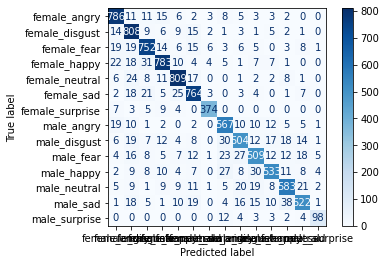

time to finish all process = 7:33:14.101678
cross_validation =  hard_voting [0.84378212 0.85817061 0.84969168 0.85020555 0.84558068 0.84763618
 0.85046249 0.8491778  0.84682601 0.83911591]
                 precision    recall  f1-score   support

   female_angry       0.92      0.93      0.93       855
 female_disgust       0.88      0.92      0.90       876
    female_fear       0.91      0.87      0.89       857
   female_happy       0.92      0.88      0.90       893
 female_neutral       0.89      0.92      0.91       889
     female_sad       0.88      0.92      0.90       853
female_surprise       0.95      0.95      0.95       402
     male_angry       0.90      0.87      0.88       644
   male_disgust       0.88      0.81      0.84       652
      male_fear       0.84      0.83      0.84       659
     male_happy       0.83      0.87      0.85       661
   male_neutral       0.86      0.88      0.87       703
       male_sad       0.85      0.86      0.86       660
  male_surpr

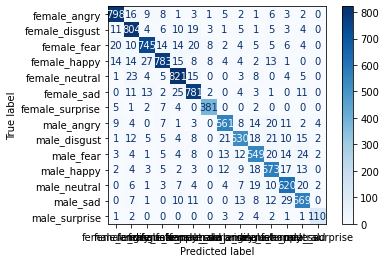

time to finish all process = 6:48:00.809832
cross_validation =  soft_voting [0.85097636 0.87410072 0.85919836 0.85714286 0.86048304 0.86793422
 0.8663926  0.86048304 0.85453611 0.85556412]


In [ ]:
list_model_vote = []
list_results = []
list_name = []
scalar_use = StandardScaler()
models = dict()

list_model_vote.append(('MLPClassifier_200', MLPClassifier(max_iter=200)))
list_model_vote.append(('MLPClassifier_400', MLPClassifier(max_iter=400)))
list_model_vote.append(('MLPClassifier_600', MLPClassifier(max_iter=600)))
list_model_vote.append(('MLPClassifier_800', MLPClassifier(max_iter=800)))
list_model_vote.append(('MLPClassifier_1000', MLPClassifier(max_iter=1000)))

models['hard_voting'] = VotingClassifier(estimators=list_model_vote, voting='hard')
models['soft_voting'] = VotingClassifier(estimators=list_model_vote, voting='soft')
# models['stacking'] = StackingClassifier(estimators=list_model_vote)


for name, model in models.items():
  start_time = datetime.now()
  pipe = Pipeline([('scaler', scalar_use), ('clf', model)])
  kfold = model_selection.KFold(n_splits=10)
  cv_results = model_selection.cross_val_score(pipe, X_train, y_train, cv=kfold, scoring = "accuracy")
  pipe.fit(X_train, y_train)
  # predict y value
  y_pred_model =pipe.predict(X_test)
  # classification_report
  print(classification_report(y_test, y_pred_model))
  # accuracy score
  print(f'accuracy_score_{model}: {cv_results.mean()} +/- {cv_results.std()}')
  print(f'accuracy_score_{model}:',accuracy_score(y_test, y_pred_model))
  # confusion_matrix
  plot_confusion_matrix(pipe, X_test, y_test,cmap="Blues")
  plt.show()

  finish_time = datetime.now()
  print("time to finish all process =",finish_time-start_time)
  list_results.append(cv_results)
  list_name.append(name)
  print("cross_validation = ",name,cv_results)
pyplot.boxplot(list_results, labels=list_name, showmeans=True)
pyplot.show()

# Result

In [4]:
list_name = []
list_accuracy = []
list_std = []
list_cv = []
list_time = []


list_name.append("DecisionTreeClassifier")
list_accuracy.append(44.54)
list_time.append(34)

list_name.append("LogisticRegression")
list_accuracy.append(40.71)
list_time.append(15)

list_name.append("RandomForestClassifier")
list_accuracy.append(85.41)
list_time.append(43)

list_name.append("KNeighborsClassifier")
list_accuracy.append(74.53)
list_time.append(6)

list_name.append("SVC")
list_accuracy.append(53.48)
list_time.append(389)

list_name.append("GaussianNB")
list_accuracy.append(9.73)
list_time.append(1)

list_name.append("XGBClassifier")
list_accuracy.append(44.08)
list_time.append(432)

list_name.append("SGDClassifier")
list_accuracy.append(33.65)
list_time.append(188)

list_name.append("MLPClassifier")
list_accuracy.append(81.96)
list_time.append(66)

list_name.append("voting classification with hard")
list_accuracy.append(86.24)
list_time.append(453)

list_name.append("voting classification with soft")
list_accuracy.append(88.64)
list_time.append(408)

list_name.append("convolutional_neural_networks")
list_accuracy.append(97.35)
list_time.append(235)

list_name.append("long_short_term_memory")
list_accuracy.append(94.00)
list_time.append(417)

list_name.append("gated_recurrent_unit")
list_accuracy.append(92.34)
list_time.append(375)

list_name.append("deep_neural_network")
list_accuracy.append(71.59)
list_time.append(171)

list_name.append("artificial_neural_network")
list_accuracy.append(73.50)
list_time.append(69)

list_name.append("cnn_and_lstm")
list_accuracy.append(93.87)
list_time.append(189)

df_result_ml = pd.DataFrame({'model': list_name,'accuracy': list_accuracy,'time':list_time})
df_result_ml

,model,accuracy,time
0,DecisionTreeClassifier,44.54,34
1,LogisticRegression,40.71,15
2,RandomForestClassifier,85.41,43
3,KNeighborsClassifier,74.53,6
4,SVC,53.48,389
5,GaussianNB,9.73,1
6,XGBClassifier,44.08,432
7,SGDClassifier,33.65,188
8,MLPClassifier,81.96,66
9,voting classification with hard,86.24,453


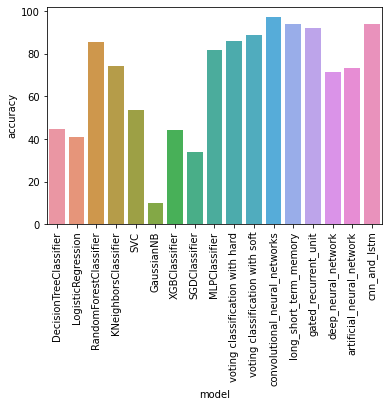

In [5]:
# sns.barplot(data=df_result_ml, x="name", y="accuracy", errorbar="std")
sns.barplot(data=df_result_ml, x="model", y="accuracy")
plt.xticks(rotation=90)
pyplot.show()


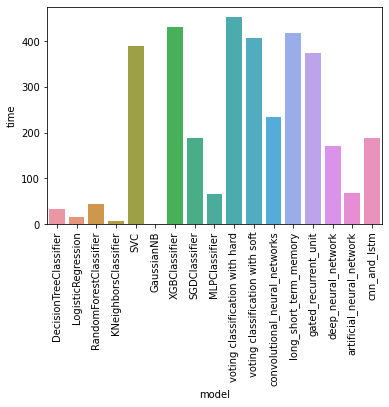

In [6]:
# sns.barplot(data=df_result_ml, x="name", y="accuracy", errorbar="std")
sns.barplot(data=df_result_ml, x="model", y="time")
plt.xticks(rotation=90)
pyplot.show()
